# I. Import Libraries

Let's start by reading the file to understand its structure and content. This will help in providing an overview of the data you mentioned. I'll read the file and display the first few rows to get a sense of the data.

The dataset contains information on the betting activity of individual customers for specific days. Here's an overview of the columns and their potential meanings:

- `DATE_DIM`: The date of the betting activity.
- `DAY_OF_WEEK`: The day of the week for the betting activity.
- `BET_ACCOUNT_NUM_HASH`: A unique identifier for each customer.
- `AGE`: The age of the customer.
- `AGE_BAND`: The age band or range the customer falls into.
- `GENDER`: The gender of the customer.
- `TENURE_IN_DAYS`: How long the customer has been with the service, in days.
- `RESIDENTIAL_STATE`: The state of residence of the customer.
- `FOB_RACING_TURNOVER`: Turnover from fixed odds betting on racing.
- `FOB_SPORT_TURNOVER`: Turnover from fixed odds betting on sports.
- `PARI_RACING_TURNOVER`: Turnover from pari-mutuel betting on racing.
- `PARI_SPORT_TURNOVER`: Turnover from pari-mutuel betting on sports.
- `TOTAL_TURNOVER`: The total betting turnover for the customer on that day.
- `DIVIDENDS_PAID`: The total dividends paid out to the customer on that day.
- `GROSS_MARGIN`: The gross margin from the customer's betting activity.
- `TICKETS`: The number of betting tickets or bets placed by the customer on that day.

The data seems well-structured for analysis, offering a comprehensive view of daily betting activities alongside demographic information about the customers. This dataset can be used to perform descriptive, diagnostic, predictive, and prescriptive analyses as outlined in your project guidelines, aiming to forecast future turnover based on historical wagering transactions and to optimize strategic decisions for WA TAB.

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# II. Import & Overview Dataset

## 2.1 Import Dataset

In [91]:
df_origin = pd.read_csv(r"D:\Data\TAB_Betting_Data.csv")
df = df_origin.copy()

## 2.2 Overview the Data

In [92]:
df.head()

,DATE_DIM,DAY_OF_WEEK,BET_ACCOUNT_NUM_HASH,AGE,AGE_BAND,GENDER,TENURE_IN_DAYS,RESIDENTIAL_STATE,FOB_RACING_TURNOVER,FOB_SPORT_TURNOVER,PARI_RACING_TURNOVER,PARI_SPORT_TURNOVER,TOTAL_TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS
0,2021-01-01,Fri,13154,67.0,65+,M,11846,WA,37.0,NaN,1081.0,NaN,1118.0,443.55,271.254275,288
1,2021-01-01,Fri,18379,54.0,45-54,M,1884,WA,40.0,NaN,NaN,NaN,40.0,0.00,40.000000,1
2,2021-01-01,Fri,559232,63.0,55-64,M,2866,WA,NaN,NaN,12.0,NaN,12.0,9.50,2.041720,5
3,2021-01-01,Fri,698904,69.0,65+,M,2100,WA,NaN,NaN,1223.5,NaN,1223.5,267.91,245.117147,40
4,2021-01-01,Fri,762921,67.0,65+,M,4766,WA,NaN,NaN,17.5,NaN,17.5,0.00,3.504075,5


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12364101 entries, 0 to 12364100
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------                -----  
 0   DATE_DIM              object 
 1   DAY_OF_WEEK           object 
 2   BET_ACCOUNT_NUM_HASH  int64  
 3   AGE                   float64
 4   AGE_BAND              object 
 5   GENDER                object 
 6   TENURE_IN_DAYS        int64  
 7   RESIDENTIAL_STATE     object 
 8   FOB_RACING_TURNOVER   float64
 9   FOB_SPORT_TURNOVER    float64
 10  PARI_RACING_TURNOVER  float64
 11  PARI_SPORT_TURNOVER   float64
 12  TOTAL_TURNOVER        float64
 13  DIVIDENDS_PAID        float64
 14  GROSS_MARGIN          float64
 15  TICKETS               int64  
dtypes: float64(8), int64(3), object(5)
memory usage: 1.5+ GB


In [94]:
df.describe()

,BET_ACCOUNT_NUM_HASH,AGE,TENURE_IN_DAYS,FOB_RACING_TURNOVER,FOB_SPORT_TURNOVER,PARI_RACING_TURNOVER,PARI_SPORT_TURNOVER,TOTAL_TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS
count,1.236410e+07,1.236142e+07,1.236410e+07,8.576656e+06,1.779580e+06,8.527489e+06,15678.000000,1.236410e+07,1.236410e+07,1.236410e+07,1.236410e+07
mean,2.144468e+09,5.314939e+01,3.437851e+03,1.235937e+02,1.278436e+02,1.063339e+02,37.800517,1.775206e+02,1.467335e+02,2.771342e+01,2.212268e+01
std,1.240403e+09,1.536221e+01,3.416204e+03,5.274644e+02,7.873640e+02,3.022158e+02,91.525587,6.407664e+02,6.863462e+02,2.300061e+02,6.451099e+01
min,1.315400e+04,1.800000e+01,-1.000000e+00,-1.000000e+03,-5.500000e+02,0.000000e+00,0.000000,-1.000000e+03,-2.550000e+03,-1.123050e+05,1.000000e+00
25%,1.067720e+09,4.100000e+01,9.550000e+02,1.000000e+01,1.000000e+01,1.000000e+01,4.000000,1.600000e+01,0.000000e+00,1.888508e+00,2.000000e+00
50%,2.151297e+09,5.400000e+01,2.316000e+03,3.000000e+01,2.300000e+01,3.000000e+01,11.000000,5.000000e+01,1.435000e+01,1.099573e+01,7.000000e+00
75%,3.217306e+09,6.500000e+01,4.708000e+03,9.000000e+01,7.200000e+01,9.575000e+01,32.000000,1.450000e+02,9.561000e+01,4.000000e+01,2.000000e+01
max,4.294965e+09,1.040000e+02,2.132900e+04,2.267710e+05,1.987243e+05,2.482320e+05,2368.000000,2.648910e+05,4.137750e+05,8.088635e+04,1.911400e+04


In [95]:
# Find the range of dates in the DATE_DIM column
date_min = df['DATE_DIM'].min()
date_max = df['DATE_DIM'].max()

date_min, date_max


('2021-01-01', '2022-12-31')

- Data range in 2 years (2021,2022)

## 2.3 Checking & Dealing with Null Values

In [96]:
# Check for null values and duplicated rows
null_values = df.isnull().sum()
null_values

DATE_DIM                       0
DAY_OF_WEEK                    0
BET_ACCOUNT_NUM_HASH           0
AGE                         2676
AGE_BAND                       0
GENDER                         0
TENURE_IN_DAYS                 0
RESIDENTIAL_STATE              0
FOB_RACING_TURNOVER      3787445
FOB_SPORT_TURNOVER      10584521
PARI_RACING_TURNOVER     3836612
PARI_SPORT_TURNOVER     12348423
TOTAL_TURNOVER                 0
DIVIDENDS_PAID                 0
GROSS_MARGIN                   0
TICKETS                        0
dtype: int64

**Null Values appear in some column**
- AGE: Since age is an important demographic attribute, we might not want to discard rows with missing ages without further analysis. One approach could be to fill in the missing values with the median age, assuming age is typically a well-behaved attribute with a central tendency.
- Betting Turnover Columns (FOB_RACING_TURNOVER, FOB_SPORT_TURNOVER, PARI_RACING_TURNOVER, PARI_SPORT_TURNOVER): For turnover columns, null values likely indicate that the customer did not place bets in those categories for the day. It would be reasonable to fill these null values with 0, indicating no activity.

In [97]:
# Fill AGE null values with the median age
df['AGE'].fillna(df['AGE'].median(), inplace=True)

# Fill betting turnover columns' null values with 0
betting_turnover_columns = ['FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER', 'PARI_SPORT_TURNOVER']
df[betting_turnover_columns] = df[betting_turnover_columns].fillna(0)


In [98]:
# Re-check for null values to confirm changes
null_values_after = df.isnull().sum()
null_values_after

DATE_DIM                0
DAY_OF_WEEK             0
BET_ACCOUNT_NUM_HASH    0
AGE                     0
AGE_BAND                0
GENDER                  0
TENURE_IN_DAYS          0
RESIDENTIAL_STATE       0
FOB_RACING_TURNOVER     0
FOB_SPORT_TURNOVER      0
PARI_RACING_TURNOVER    0
PARI_SPORT_TURNOVER     0
TOTAL_TURNOVER          0
DIVIDENDS_PAID          0
GROSS_MARGIN            0
TICKETS                 0
dtype: int64

- No null left

## 2.4 Checking & Dealing with duplicated rows

In [99]:
duplicated_rows = df.duplicated().sum()
duplicated_rows

0

- No duplicated rows founf in this dataset. Luckily!

## 2.5 Checking Unique Per Columns

In [100]:
for column in df.columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print("\n")


Unique values in 'DATE_DIM':
['2021-01-01' '2021-01-02' '2021-01-03' '2021-01-04' '2021-01-05'
 '2021-01-06' '2021-01-07' '2021-01-08' '2021-01-09' '2021-01-10'
 '2021-01-11' '2021-01-12' '2021-01-13' '2021-01-14' '2021-01-15'
 '2021-01-16' '2021-01-17' '2021-01-18' '2021-01-19' '2021-01-20'
 '2021-01-21' '2021-01-22' '2021-01-23' '2021-01-24' '2021-01-25'
 '2021-01-26' '2021-01-27' '2021-01-28' '2021-01-29' '2021-01-30'
 '2021-01-31' '2021-02-01' '2021-02-02' '2021-02-03' '2021-02-04'
 '2021-02-05' '2021-02-06' '2021-02-07' '2021-02-08' '2021-02-09'
 '2021-02-10' '2021-02-11' '2021-02-12' '2021-02-13' '2021-02-14'
 '2021-02-15' '2021-02-16' '2021-02-17' '2021-02-18' '2021-02-19'
 '2021-02-20' '2021-02-21' '2021-02-22' '2021-02-23' '2021-02-24'
 '2021-02-25' '2021-02-26' '2021-02-27' '2021-02-28' '2021-03-01'
 '2021-03-02' '2021-03-03' '2021-03-04' '2021-03-05' '2021-03-06'
 '2021-03-07' '2021-03-08' '2021-03-09' '2021-03-10' '2021-03-11'
 '2021-03-12' '2021-03-13' '2021-03-14' '2021-0

In [101]:
# Mapping for converting days of the week from names to numbers as specified
day_of_week_mapping = {
    'Fri': 6, 'Sat': 7, 'Sun': 8,
    'Mon': 2, 'Tue': 3, 'Wed': 4, 'Thu': 5
}

# Apply the mapping to convert 'DAY_OF_WEEK' column
df['DAY_OF_WEEK'] = df['DAY_OF_WEEK'].map(day_of_week_mapping)

# Verify the conversion by checking the unique values in 'DAY_OF_WEEK' column
df.head()


,DATE_DIM,DAY_OF_WEEK,BET_ACCOUNT_NUM_HASH,AGE,AGE_BAND,GENDER,TENURE_IN_DAYS,RESIDENTIAL_STATE,FOB_RACING_TURNOVER,FOB_SPORT_TURNOVER,PARI_RACING_TURNOVER,PARI_SPORT_TURNOVER,TOTAL_TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS
0,2021-01-01,6,13154,67.0,65+,M,11846,WA,37.0,0.0,1081.0,0.0,1118.0,443.55,271.254275,288
1,2021-01-01,6,18379,54.0,45-54,M,1884,WA,40.0,0.0,0.0,0.0,40.0,0.00,40.000000,1
2,2021-01-01,6,559232,63.0,55-64,M,2866,WA,0.0,0.0,12.0,0.0,12.0,9.50,2.041720,5
3,2021-01-01,6,698904,69.0,65+,M,2100,WA,0.0,0.0,1223.5,0.0,1223.5,267.91,245.117147,40
4,2021-01-01,6,762921,67.0,65+,M,4766,WA,0.0,0.0,17.5,0.0,17.5,0.00,3.504075,5


## 2.6 Dealing with Negative

In [102]:
# List of specified columns to check for negative values
specified_columns = [
    'FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER', 
    'PARI_SPORT_TURNOVER', 'TOTAL_TURNOVER', 'DIVIDENDS_PAID', 'GROSS_MARGIN', 'TICKETS'
]

# Counting the number of negative values in each specified column in the cleaned dataset
negative_value_counts_cleaned = {column: (df[column] < 0).sum() for column in specified_columns}

negative_value_counts_cleaned


{'FOB_RACING_TURNOVER': 168,
 'FOB_SPORT_TURNOVER': 107,
 'PARI_RACING_TURNOVER': 0,
 'PARI_SPORT_TURNOVER': 0,
 'TOTAL_TURNOVER': 199,
 'DIVIDENDS_PAID': 247,
 'GROSS_MARGIN': 1929139,
 'TICKETS': 0}

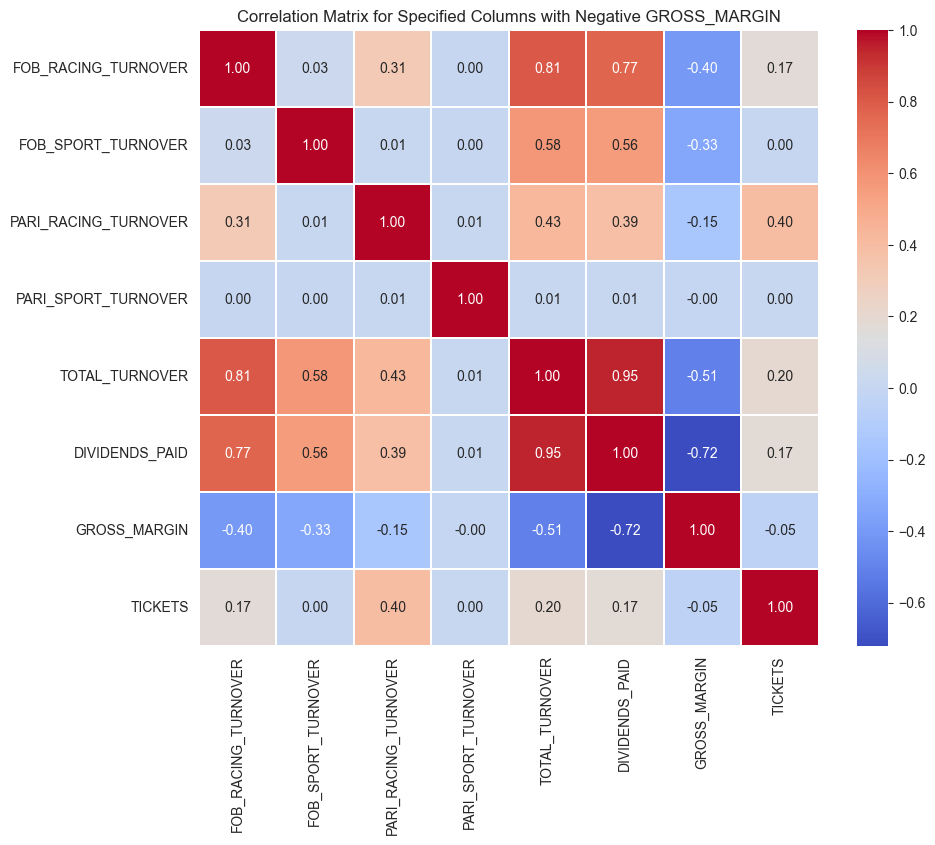

In [103]:
# Filter records with negative GROSS_MARGIN from the cleaned dataset
negative_gross_margin_records = df[df['GROSS_MARGIN'] < 0]

# Calculate the correlation among specified numerical features for records with negative GROSS_MARGIN
specified_columns_for_correlation = [
    'FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER', 
    'PARI_SPORT_TURNOVER', 'TOTAL_TURNOVER', 'DIVIDENDS_PAID', 'GROSS_MARGIN', 'TICKETS'
]
negative_gross_margin_correlation = negative_gross_margin_records[specified_columns_for_correlation].corr()

# Plotting the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(negative_gross_margin_correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.05)
plt.title("Correlation Matrix for Specified Columns with Negative GROSS_MARGIN")
plt.show()


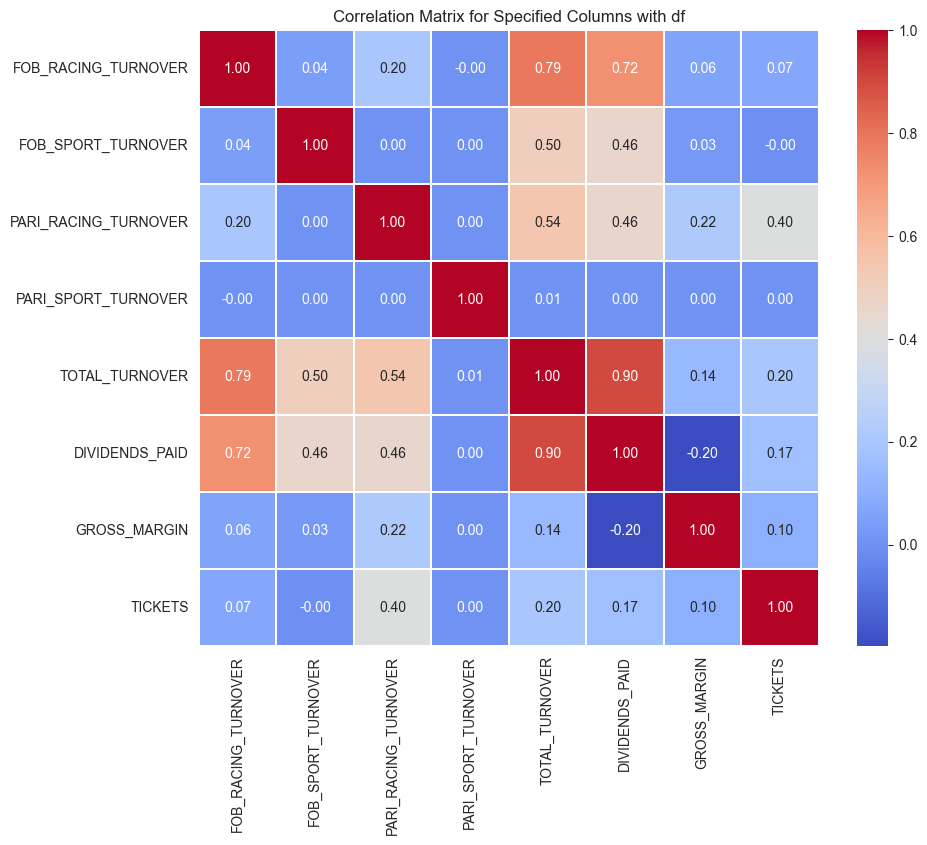

In [104]:


# Calculate the correlation among specified numerical features for records with negative GROSS_MARGIN
specified_columns_for_correlation = [
    'FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER', 
    'PARI_SPORT_TURNOVER', 'TOTAL_TURNOVER', 'DIVIDENDS_PAID', 'GROSS_MARGIN', 'TICKETS'
]
df_corr = df[specified_columns_for_correlation].corr()

# Plotting the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.05)
plt.title("Correlation Matrix for Specified Columns with df")
plt.show()


Trong biểu đồ ma trận tương quan mới này, chúng ta có thể thấy một số mối liên hệ khác biệt so với ma trận trước đó:

1. **`TOTAL_TURNOVER` và `DIVIDENDS_PAID`**: Sự tương quan mạnh (0.90) giữa tổng doanh thu và số tiền thưởng trả ra vẫn đứng vững, khẳng định rằng khi doanh thu từ cược tăng lên, số tiền thưởng trả cho người chơi cũng tăng theo.

2. **`FOB_RACING_TURNOVER` và `TOTAL_TURNOVER`**: Có một mối tương quan khá mạnh (0.79), cho thấy rằng doanh thu từ cược đua ngựa cố định là một phần quan trọng của tổng doanh thu cược.

3. **`GROSS_MARGIN`**: Không có mối liên hệ mạnh nào giữa `GROSS_MARGIN` và các cột doanh thu cược cụ thể (tất cả đều dưới 0.25), cho thấy rằng các yếu tố khác ngoài doanh thu cược có thể đang ảnh hưởng đến lợi nhuận ròng. Điều này có thể bao gồm cấu trúc chi phí, quản lý rủi ro, hoặc các yếu tố thị trường khác.

4. **`TICKETS`**: Không có mối liên hệ đáng kể giữa số lượng vé (`TICKETS`) và `GROSS_MARGIN` (0.10), gợi ý rằng việc tăng số lượng giao dịch không trực tiếp dẫn đến việc cải thiện lợi nhuận ròng.

5. **Mối liên hệ giữa `FOB_RACING_TURNOVER` và `DIVIDENDS_PAID`**: Mối tương quan dương (0.72) cho thấy rằng số tiền thưởng trả ra có thể bị ảnh hưởng đáng kể bởi doanh thu từ cược đua ngựa cố định.

Dựa trên những phát hiện này, WA TAB có thể cần xem xét việc điều chỉnh chiến lược định giá và quản lý rủi ro của mình, đặc biệt là trong các loại hình cược có tương quan cao với số tiền thưởng trả ra. Điều quan trọng là cần phải cân nhắc đến cả tỷ lệ cược và kỳ vọng của khách hàng để đảm bảo rằng lợi nhuận được tối ưu hóa.

In [105]:
# Extracting records where any of the specified columns have negative values
columns_with_potential_negatives = [
    'FOB_RACING_TURNOVER', 'FOB_SPORT_TURNOVER', 'PARI_RACING_TURNOVER',
    'PARI_SPORT_TURNOVER', 'TOTAL_TURNOVER', 'DIVIDENDS_PAID', 'GROSS_MARGIN'
]

# Create a condition for any of the specified columns to have negative values
condition = (df[columns_with_potential_negatives] < 0).any(axis=1)

# Filter the records based on the condition
negative_value_records = df[condition]

negative_value_records


,DATE_DIM,DAY_OF_WEEK,BET_ACCOUNT_NUM_HASH,AGE,AGE_BAND,GENDER,TENURE_IN_DAYS,RESIDENTIAL_STATE,FOB_RACING_TURNOVER,FOB_SPORT_TURNOVER,PARI_RACING_TURNOVER,PARI_SPORT_TURNOVER,TOTAL_TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS
6,2021-01-01,6,1213538,46.0,45-54,M,714,WA,56.0,68.0,10.0,0.0,134.0,149.00,-23.279175,12
7,2021-01-01,6,1225565,76.0,65+,M,10686,WA,10.0,0.0,0.0,0.0,10.0,35.00,-25.000000,1
15,2021-01-01,6,3099282,81.0,65+,M,5182,WA,35.0,0.0,119.4,0.0,154.4,279.31,-98.807931,18
26,2021-01-01,6,5088323,61.0,55-64,U,894,WA,55.0,0.0,0.0,0.0,55.0,84.00,-29.000000,2
32,2021-01-01,6,5932568,30.0,25-34,M,2553,WA,50.0,0.0,0.0,0.0,50.0,60.00,-10.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12364078,2022-12-31,7,4290850633,67.0,65+,U,1400,OTH,14.0,0.0,0.0,0.0,14.0,20.00,-6.000000,7
12364083,2022-12-31,7,4291637614,39.0,35-44,M,6107,WA,605.0,0.0,117.5,0.0,722.5,780.10,-35.704346,77
12364090,2022-12-31,7,4292843937,30.0,25-34,M,1667,WA,106.0,0.0,0.0,0.0,106.0,132.00,-26.000000,9
12364094,2022-12-31,7,4293602952,46.0,45-54,M,3816,WA,342.0,0.0,122.5,0.0,464.5,486.15,-58.899433,34


- Nhận xét chung của mấy cái giá trị âm này là giá trị trung bình không lớn, độ lệch của các giá trị cũng cao nữa. Chúng ta có nhiều cách để giải quyết
    - Loại bỏ: Loại bỏ hoàn toàn thì ít nhiều sẽ ảnh hưởng ít đến kết quả cuối. Và nó cũng chỉ chiếm số ít cọ thể 1xx trong 12tr dòng. 
    - Thay đổi: 
        - Nếu bạn quyết định xử lý các giá trị âm trong cột `FOB_SPORT_TURNOVER` thay vì loại bỏ chúng hoàn toàn, có một số phương pháp bạn có thể xem xét:

        ### 1. Thiết Lập Lại Giá Trị Bằng 0
        Giả định rằng các giá trị âm không phản ánh chính xác hoạt động cược và có thể được xem là không có hoạt động, bạn có thể thiết lập lại chúng thành 0.

        ```python
        data.loc[data['FOB_SPORT_TURNOVER'] < 0, 'FOB_SPORT_TURNOVER'] = 0
        ```

        ### 2. Chuyển Đổi Sang Giá Trị Tuyệt Đối
        Nếu giả định rằng giá trị tuyệt đối của các số liệu âm có ý nghĩa trong một bối cảnh nào đó (ví dụ, biểu thị giá trị hoàn tiền), bạn có thể chuyển đổi chúng sang giá trị tuyệt đối.

        ```python
        data['FOB_SPORT_TURNOVER'] = data['FOB_SPORT_TURNOVER'].abs()
        ```

        ### 3. Sử Dụng Giá Trị Trung Bình hoặc Trung Vị
        Nếu giá trị âm được coi là ngoại lệ, bạn có thể thay thế chúng bằng giá trị trung bình hoặc trung vị của cột. Điều này giúp giữ dữ liệu ổn định mà không bị ảnh hưởng bởi ngoại lệ.

        ```python
        mean_value = data['FOB_SPORT_TURNOVER'][data['FOB_SPORT_TURNOVER'] >= 0].mean()
        data.loc[data['FOB_SPORT_TURNOVER'] < 0, 'FOB_SPORT_TURNOVER'] = mean_value
        ```

        hoặc

        ```python
        median_value = data['FOB_SPORT_TURNOVER'][data['FOB_SPORT_TURNOVER'] >= 0].median()
        data.loc[data['FOB_SPORT_TURNOVER'] < 0, 'FOB_SPORT_TURNOVER'] = median_value
        ```
---------------------------
- Dựa vào cá nhân, cảm nhận và kinh nghiệm thì mình sẽ loại bỏ hoàn toàn, và coi đây là các giá trị ngoại lai.

In [106]:
shape_before = df.shape

# Removing rows with negative values in FOB_SPORT_TURNOVER
condition = (
    (df['FOB_SPORT_TURNOVER'] >= 0) &
    (df['FOB_RACING_TURNOVER'] >= 0) &
    (df['PARI_RACING_TURNOVER'] >= 0) &
    (df['PARI_SPORT_TURNOVER'] >= 0) &
    (df['TOTAL_TURNOVER'] >= 0) &
    (df['DIVIDENDS_PAID'] >= 0)
)

df = df[condition]
# Check the shape of the data before and after removal to confirm the change
shape_after = df.shape

shape_before, shape_after



((12364101, 16), (12363655, 16))

In [107]:
rows_removed = shape_before[0]-shape_after[0]
rows_removed

446

## 2.7 Dealing with Time Features

In [110]:
# Convert DATE_DIM to datetime format
df['DATE_DIM'] = pd.to_datetime(df['DATE_DIM'])
# Tạo cột 'Week' và 'Month'
df['Week'] = df['DATE_DIM'].dt.isocalendar().week
df['Month'] = df['DATE_DIM'].dt.month
df['Year'] = df['DATE_DIM'].dt.year
# Convert DATE_DIM to datetime format
df['DATE_DIM'] = df['DATE_DIM'].dt.date
# Check the conversion by displaying the dtype of DATE_DIM
df['DATE_DIM'].dtype

df.head()

,DATE_DIM,DAY_OF_WEEK,BET_ACCOUNT_NUM_HASH,AGE,AGE_BAND,GENDER,TENURE_IN_DAYS,RESIDENTIAL_STATE,FOB_RACING_TURNOVER,FOB_SPORT_TURNOVER,PARI_RACING_TURNOVER,PARI_SPORT_TURNOVER,TOTAL_TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS,Week,Month,Year
0,2021-01-01,6,13154,67.0,65+,M,11846,WA,37.0,0.0,1081.0,0.0,1118.0,443.55,271.254275,288,53,1,2021
1,2021-01-01,6,18379,54.0,45-54,M,1884,WA,40.0,0.0,0.0,0.0,40.0,0.00,40.000000,1,53,1,2021
2,2021-01-01,6,559232,63.0,55-64,M,2866,WA,0.0,0.0,12.0,0.0,12.0,9.50,2.041720,5,53,1,2021
3,2021-01-01,6,698904,69.0,65+,M,2100,WA,0.0,0.0,1223.5,0.0,1223.5,267.91,245.117147,40,53,1,2021
4,2021-01-01,6,762921,67.0,65+,M,4766,WA,0.0,0.0,17.5,0.0,17.5,0.00,3.504075,5,53,1,2021


# III. Data Visualization

## 3.1 Descriptive Analysis

In [21]:
df.head()

,DATE_DIM,DAY_OF_WEEK,BET_ACCOUNT_NUM_HASH,AGE,AGE_BAND,GENDER,TENURE_IN_DAYS,RESIDENTIAL_STATE,FOB_RACING_TURNOVER,FOB_SPORT_TURNOVER,PARI_RACING_TURNOVER,PARI_SPORT_TURNOVER,TOTAL_TURNOVER,DIVIDENDS_PAID,GROSS_MARGIN,TICKETS
0,2021-01-01,6,13154,67.0,65+,M,11846,WA,37.0,0.0,1081.0,0.0,1118.0,443.55,271.254275,288
1,2021-01-01,6,18379,54.0,45-54,M,1884,WA,40.0,0.0,0.0,0.0,40.0,0.00,40.000000,1
2,2021-01-01,6,559232,63.0,55-64,M,2866,WA,0.0,0.0,12.0,0.0,12.0,9.50,2.041720,5
3,2021-01-01,6,698904,69.0,65+,M,2100,WA,0.0,0.0,1223.5,0.0,1223.5,267.91,245.117147,40
4,2021-01-01,6,762921,67.0,65+,M,4766,WA,0.0,0.0,17.5,0.0,17.5,0.00,3.504075,5


### 3.1.1 Age

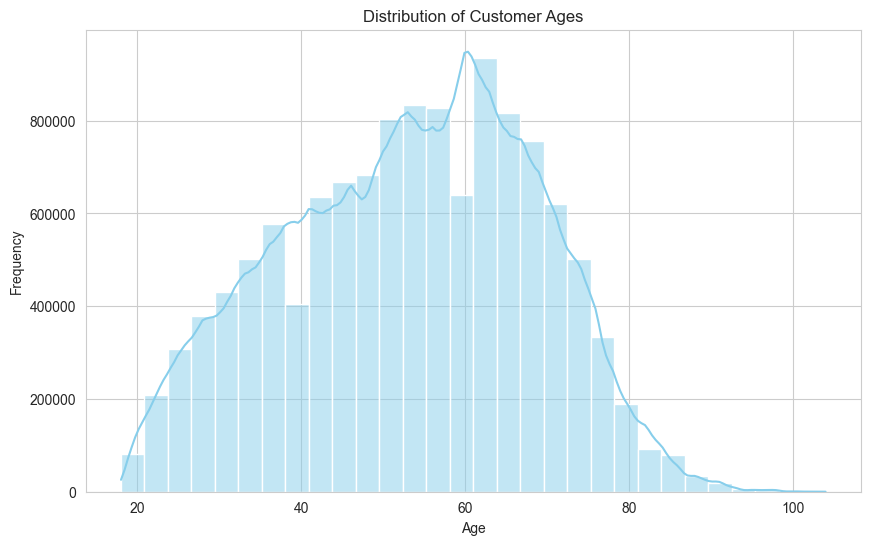

In [22]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot for AGE
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


### 3.1.2 Gender

C:\Users\thanh\AppData\Local\Temp\ipykernel_5376\50505736.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='GENDER', data=df, palette='coolwarm')


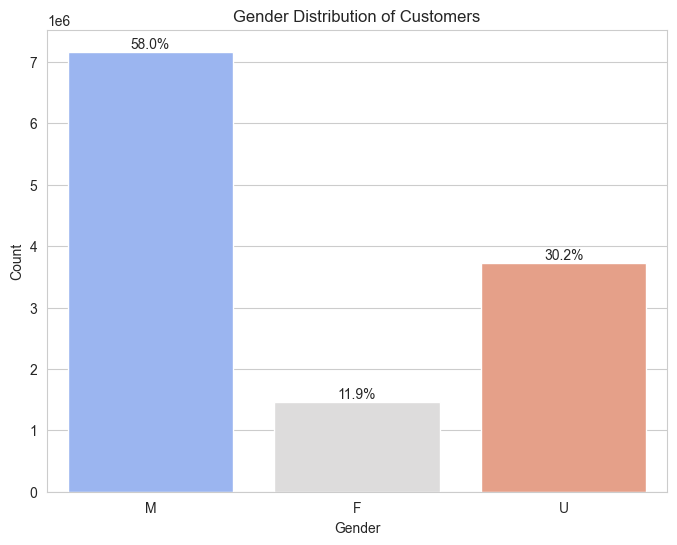

In [23]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='GENDER', data=df, palette='coolwarm')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')

# Annotate bars with counts
total = len(df['GENDER'])
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()


Theo biểu đồ:

- Phần lớn khách hàng là nam giới, chiếm 58.0%.
- Số lượng khách hàng nữ ít hơn, chỉ chiếm 11.9%.
- Có một tỷ lệ đáng kể khách hàng không xác định giới tính (có thể là không cung cấp hoặc dữ liệu không rõ ràng), chiếm 30.2%.

Dựa vào thông tin từ biểu đồ, ta có thể rút ra một số insight như sau:

1. Có vẻ như đàn ông tham gia cá cược nhiều hơn phụ nữ, điều này có thể ảnh hưởng đến cách tiếp cận marketing và sản phẩm của WA TAB.
2. Tỷ lệ khách hàng không xác định giới tính cao gần bằng một nửa số lượng khách hàng nam, điều này cho thấy rằng có một cơ hội để tăng cường việc thu thập dữ liệu giới tính hoặc để tối ưu hóa chiến lược tiếp cận khách hàng không xác định.
3. WA TAB có thể cần phát triển sản phẩm và dịch vụ nhắm đến đặc trưng của từng nhóm giới tính, đặc biệt là tập trung vào việc thu hút nhiều khách hàng nữ hơn.
4. Các chương trình khuyến mãi hoặc sản phẩm cá cược có thể được thiết kế để thu hút nhiều khách hàng nữ hơn, hoặc để phục vụ nhu cầu đa dạng của nhóm khách hàng không xác định.

Nếu WA TAB muốn cải thiện việc thu hút và giữ chân khách hàng, họ có thể cần phân tích sâu hơn về hành vi đặt cược và sở thích của từng nhóm giới tính để phát triển các chiến lược marketing và sản phẩm cụ thể hơn.

### 3.1.3 Tenure in days

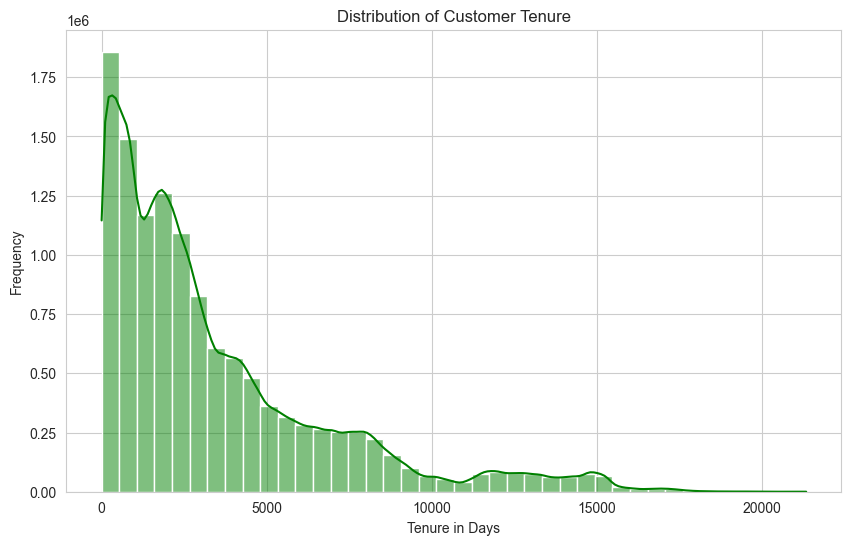

In [24]:
# Plot for TENURE_IN_DAYS
plt.figure(figsize=(10, 6))
sns.histplot(df['TENURE_IN_DAYS'], bins=40, kde=True, color='green')
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure in Days')
plt.ylabel('Frequency')
plt.show()


Biểu đồ mô tả phân bố thời gian khách hàng ở lại với WA TAB theo số ngày. Đây là những insights có thể rút ra từ biểu đồ này:

1. **Độ nghiêng lớn**: Có một số lượng lớn khách hàng mới hoặc khách hàng có thời gian ngắn, hàm ý rằng WA TAB thu hút nhiều khách hàng mới hoặc có khách hàng chỉ tham gia trong một thời gian ngắn.
2. **Giảm dần nhanh chóng**: Số lượng khách hàng giảm nhanh sau khoảng thời gian ban đầu, có thể chỉ ra rằng khách hàng không duy trì hoạt động cá cược lâu dài.
3. **Lượng khách hàng trung thành nhỏ**: Một lượng nhỏ khách hàng có thời gian ở lại dài hơn (từ 5,000 ngày trở lên), có thể được coi là khách hàng trung thành.

Về mối quan hệ với biến `TOTAL_TURNOVER`, đây là một số điểm mà WA TAB có thể xem xét:

- **Khách hàng mới so với khách hàng lâu năm**: Khách hàng mới có thể có tổng doanh thu đặt cược thấp hơn so với những người đã tham gia lâu dài do sự không chắc chắn và thói quen đặt cược chưa phát triển.
- **Giá trị khách hàng lâu dài (LTV)**: Khách hàng có thời gian ở lại lâu hơn có thể có Giá trị trọn đời cao hơn, có nghĩa là họ có thể tạo ra doanh thu cao hơn trong suốt thời gian họ tham gia.
- **Churn Rate**: Tỷ lệ khách hàng ngừng sử dụng dịch vụ có thể ảnh hưởng đến tổng doanh thu. Việc giảm tỷ lệ này có thể tăng doanh thu bền vững.
- **Segmentation và Retention Strategies**: Phân đoạn khách hàng dựa trên thời gian ở lại để xác định những ai là khách hàng có giá trị cao và phát triển các chiến lược nhằm tăng cường giữ chân họ.

WA TAB nên xem xét phân tích thêm để xác định mối liên kết cụ thể giữa thời gian ở lại và tổng doanh thu đặt cược. Điều này có thể bao gồm việc xác định các xu hướng đặt cược trong các nhóm khác nhau dựa trên thời gian ở lại và phát triển chiến lược để tối ưu hóa giá trị từ các nhóm khách hàng khác nhau.

### 3.1.4 Các biến tiền bạc

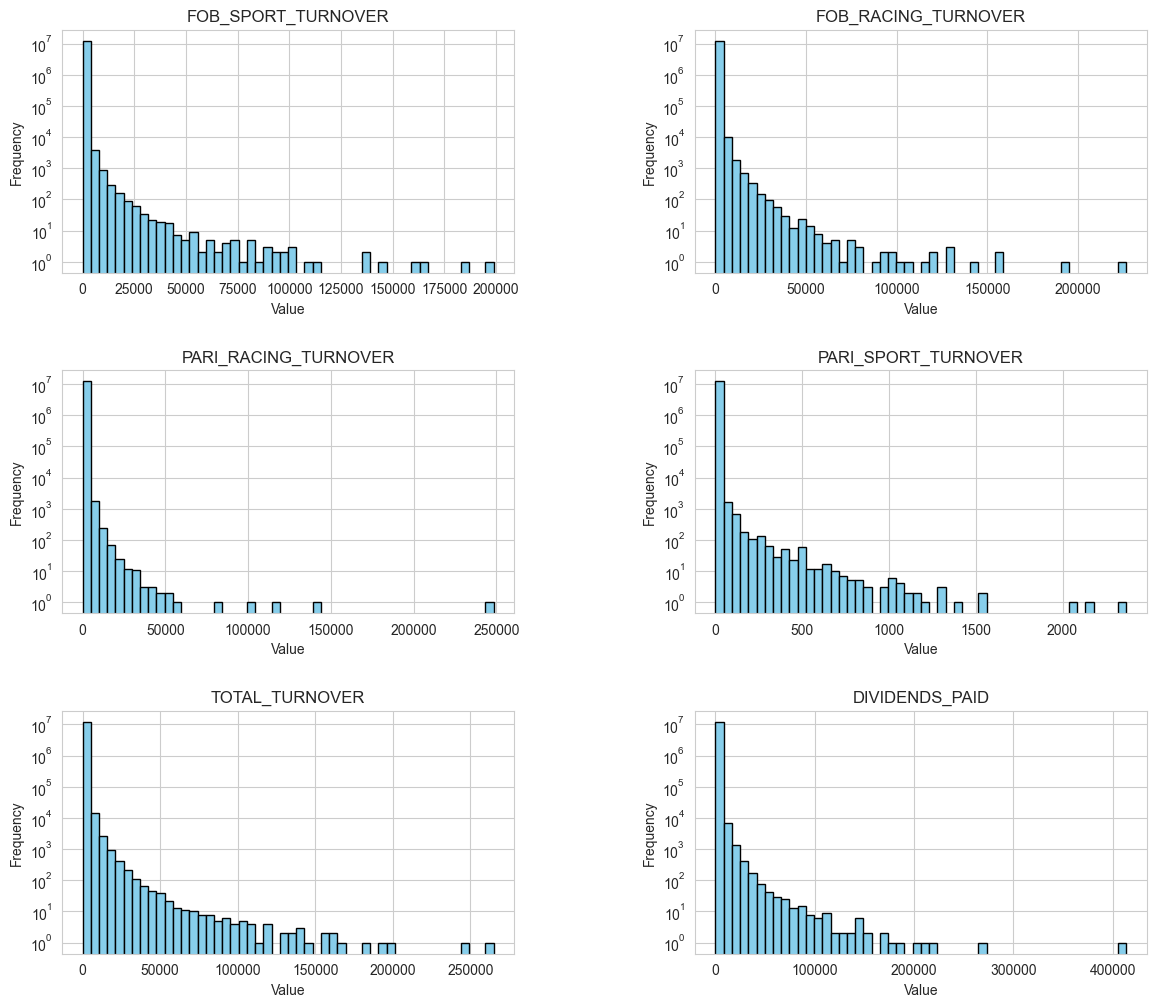

In [25]:
import matplotlib.pyplot as plt

# Columns to plot
columns_to_plot = ['FOB_SPORT_TURNOVER', 'FOB_RACING_TURNOVER',
                   'PARI_RACING_TURNOVER', 'PARI_SPORT_TURNOVER',
                   'TOTAL_TURNOVER', 'DIVIDENDS_PAID']

# Plotting
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, column in enumerate(columns_to_plot):
    ax = axs[i//2, i%2]
    df[column].hist(bins=50, ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(column)
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Value')
    ax.set_yscale('log') # Log scale for better visualization of wide-ranging values

plt.show()

Các biểu đồ bạn cung cấp đều có dạng log-log, nghĩa là cả trục x (giá trị) và trục y (tần suất) đều được hiển thị trên thang logarit. Điều này thường được sử dụng để thể hiện dữ liệu phân phối lệch hoặc khi có sự chênh lệch lớn giữa các giá trị. Dưới đây là nhận xét và insight cho từng biểu đồ:

1. **FOB_SPORT_TURNOVER**:
   - Phân phối tập trung cao ở giá trị thấp, giảm mạnh khi giá trị tăng.
   - Điều này cho thấy số lượng lớn khách hàng đặt cược ít trên thể thao và số ít khách hàng đặt cược với số tiền lớn.

2. **FOB_RACING_TURNOVER**:
   - Mô hình tương tự như FOB_SPORT_TURNOVER, nhưng với phạm vi giá trị cao hơn.
   - Có thể thấy rằng cá cược đua ngựa có tổng doanh số cao hơn so với cá cược thể thao.

3. **PARI_RACING_TURNOVER**:
   - Cũng giống như hai biểu đồ trước, nhưng giới hạn ở giá trị thấp hơn.
   - Cá cược Parimutuel trong đua ngựa không phải là lựa chọn phổ biến so với Fixed Odds Betting (FOB).

4. **PARI_SPORT_TURNOVER**:
   - Phạm vi giá trị còn thấp hơn nhiều so với cá cược đua ngựa.
   - Rất ít khách hàng tham gia cá cược Parimutuel trên thể thao, hàm ý đây không phải là hình thức cá cược được ưa chuộng.

5. **TOTAL_TURNOVER**:
   - Đây là tổng số doanh thu từ tất cả các loại cá cược.
   - Mô hình phân phối tương tự như các loại cá cược riêng lẻ, với đa số doanh thu đến từ những giao dịch nhỏ.

6. **DIVIDENDS_PAID**:
   - Phân phối này có hình dạng giống với tổng doanh thu, điều này hợ có thể giả định rằng có mối quan hệ mật thiết giữa số tiền đặt cược và số tiền trả thưởng. Phần lớn số tiền thưởng được trả cho những khoản đặt cược nhỏ, với một số ít trường hợp có số tiền thưởng lớn.

Dựa trên những quan sát này, dưới đây là một số insights mà WA TAB có thể xem xét:

- **Phân khúc khách hàng**: Hầu hết khách hàng có xu hướng đặt cược với số tiền nhỏ. WA TAB có thể tập trung vào việc tối ưu hóa trải nghiệm cho phân khúc này để tăng cường sự hài lòng và khả năng quay lại đặt cược.
- **Sản phẩm và chiến lược**: Có vẻ như đua ngựa là một phần quan trọng của doanh thu cá cược, đòi hỏi chiến lược marketing và sản phẩm chú trọng đến loại hình này.
- **Cá cược Parimutuel**: Cần phải đánh giá lại sự hấp dẫn của cá cược Parimutuel so với FOB, đặc biệt là trong thể thao, do số lượng giao dịch thấp.
- **Định giá và Quản lý rủi ro**: Sự chênh lệch lớn giữa các khoản đặt cược nhỏ và lớn đòi hỏi một hệ thống định giá tốt và quản lý rủi ro để đảm bảo lợi nhuận.
- **Chiến lược giữ chân**: Xem xét phát triển các chương trình khách hàng thân thiết hoặc ưu đãi để giữ chân những khách hàng đặt cược lớn, do họ có thể tạo ra một phần đáng kể của tổng doanh thu.
- **Khám phá mối quan hệ doanh thu và thưởng**: Phân tích mối quan hệ giữa tổng doanh thu và tiền thưởng được trả để tối ưu hóa chính sách thưởng lũy tiến hoặc giảm thiểu rủi ro cho công ty.

### 3.1.5 Days Of Weeek

C:\Users\thanh\AppData\Local\Temp\ipykernel_5376\1947241439.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DAY_OF_WEEK', data=df, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], palette='viridis')


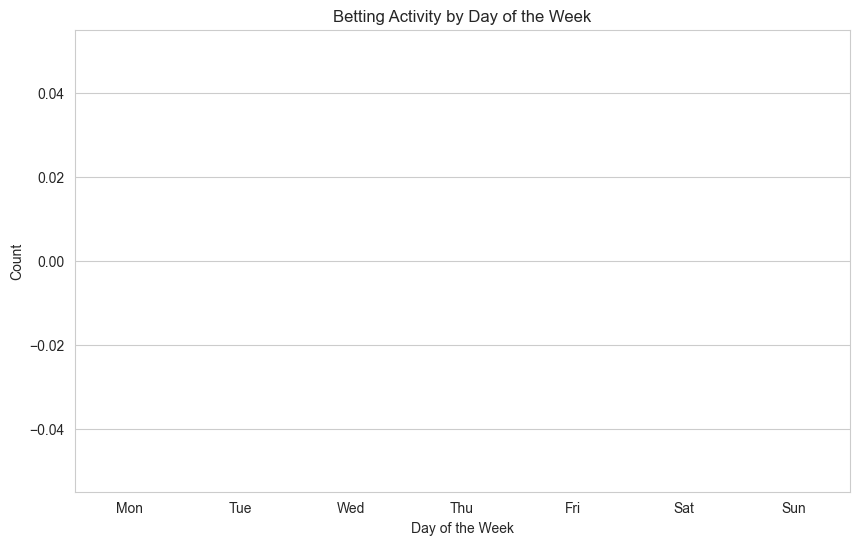

In [ ]:
# Plot for DAY_OF_WEEK
plt.figure(figsize=(10, 6))
sns.countplot(x='DAY_OF_WEEK', data=df, order=['2', '3', '4', '5', '6', '7', '8'], palette='viridis')
plt.title('Betting Activity by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()


Biểu đồ thể hiện số lượng hoạt động đặt cược theo từng ngày trong tuần. Dưới đây là một số insights có thể rút ra từ biểu đồ:

- **Tăng cường vào cuối tuần**: Có sự gia tăng rõ rệt về số lượng đặt cược vào ngày thứ Bảy, đây là ngày cao điểm trong tuần với lượng đặt cược nhiều nhất.
- **Hoạt động thấp vào đầu tuần**: Ngày thứ Hai và thứ Ba có số lượng đặt cược thấp nhất trong tuần, cho thấy sự quan tâm giảm sút sau cuối tuần.
- **Xu hướng tăng dần**: Từ thứ Ba đến thứ Sáu, có thể thấy số lượng đặt cược tăng dần, hàm ý rằng hoạt động cá cược có xu hướng tăng lên theo dần dần khi tiến gần đến cuối tuần.
- **Chủ nhật**: Mặc dù số lượng đặt cược vào Chủ nhật giảm so với thứ Bảy, nhưng vẫn cao hơn so với ngày thường, cho thấy ngày cuối tuần vẫn là thời điểm quan trọng đối với hoạt động cá cược.

Dựa vào những thông tin này, WA TAB có thể:

- **Điều chỉnh chiến dịch marketing**: Tăng cường chiến dịch quảng cáo và khuyến mãi vào cuối tuần để thu hút khách hàng.
- **Lên lịch sự kiện**: Tổ chức các sự kiện lớn hoặc đặt cược đặc biệt vào thứ Bảy để tận dụng ngày có lượng đặt cược cao nhất.
- **Phân tích chi tiết hơn**: Nghiên cứu sâu hơn về loại sự kiện nào hoặc loại đặt cược nào được ưa chuộng vào cuối tuần để định hình sản phẩm và dịch vụ tốt hơn.
- **Giảm bớt sự giảm sút**: Phát triển các chiến lược để kích thích hoạt động đặt cược vào những ngày đầu tuần khi hoạt động đặt cược thấp.

WA TAB nên xem xét những dữ liệu này khi lập kế hoạch cho các chiến lược phát triển sản phẩm, marketing và quản lý rủi ro.

### 3.1.6 Residential State

C:\Users\thanh\AppData\Local\Temp\ipykernel_5376\3981745805.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='RESIDENTIAL_STATE', data=df, palette='autumn')


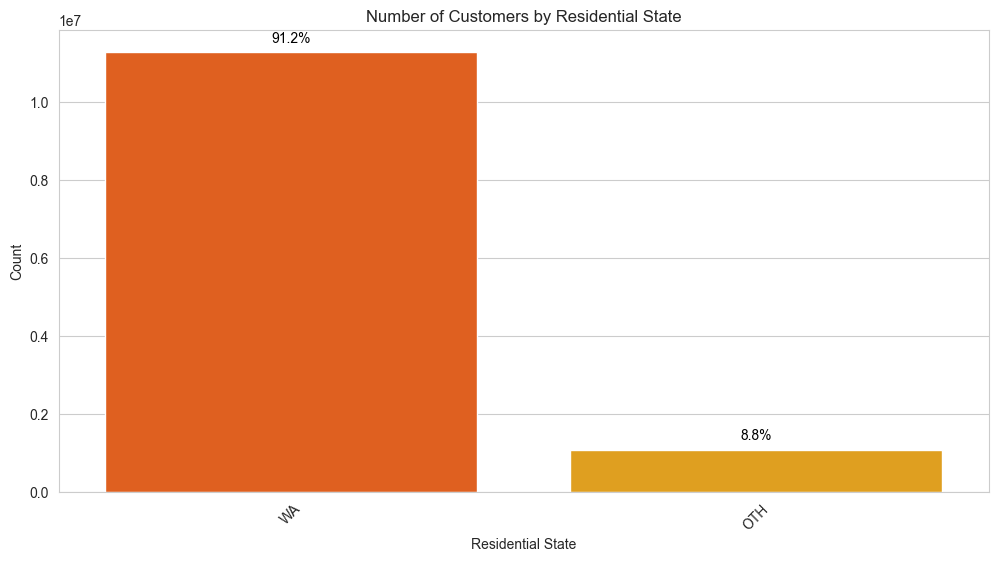

In [27]:
# Plot for RESIDENTIAL_STATE with percentages
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='RESIDENTIAL_STATE', data=df, palette='autumn')
plt.title('Number of Customers by Residential State')
plt.xlabel('Residential State')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Calculate total number of entries for calculating percentages
total = len(df['RESIDENTIAL_STATE'])

# Annotate percentages above bars
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', rotation=0, xytext=(0, 10),
                textcoords='offset points')

plt.show()


Biểu đồ thể hiện phân bố số lượng khách hàng theo tiểu bang cư trú, với "WA" là Tây Úc và "OTH" có thể hiểu là các tiểu bang hoặc khu vực khác. Dưới đây là một số nhận xét và insights:

- **Phân bố khách hàng chủ yếu ở WA**: Một phần lớn khách hàng (91.2%) là cư dân của Tây Úc, nơi mà Racing and Wagering Western Australia (RWWA) hoạt động.
- **Một lượng nhỏ khách hàng từ các khu vực khác (OTH)**: Chỉ có 8.8% khách hàng đến từ các khu vực ngoài Tây Úc.

Dựa trên thông tin này, WA TAB có thể:

- **Chiến lược tập trung**: Tập trung vào việc cung cấp dịch vụ và sản phẩm cá cược tốt hơn cho thị trường chính là Tây Úc.
- **Mở rộng thị trường**: Xác định các cơ hội để mở rộng thị trường ngoài Tây Úc và thu hút thêm khách hàng từ các khu vực khác.
- **Nghiên cứu thị trường địa phương**: Phân tích sâu hơn về hành vi và sở thích cá cược của cư dân Tây Úc để tối ưu hóa các chiến dịch marketing và sản phẩm cá cược.
- **Chiến lược đa dạng hóa**: Phát triển các chiến lược để thu hút và giữ chân khách hàng ở các tiểu bang hoặc khu vực khác, có thể thông qua việc cung cấp các sản phẩm cá cược đặc trưng phù hợp với từng địa phương.

WA TAB nên cân nhắc đến những số liệu này khi đánh giá chiến lược phát triển thị trường và cung cấp dịch vụ.

### 3.1.7 Age Band

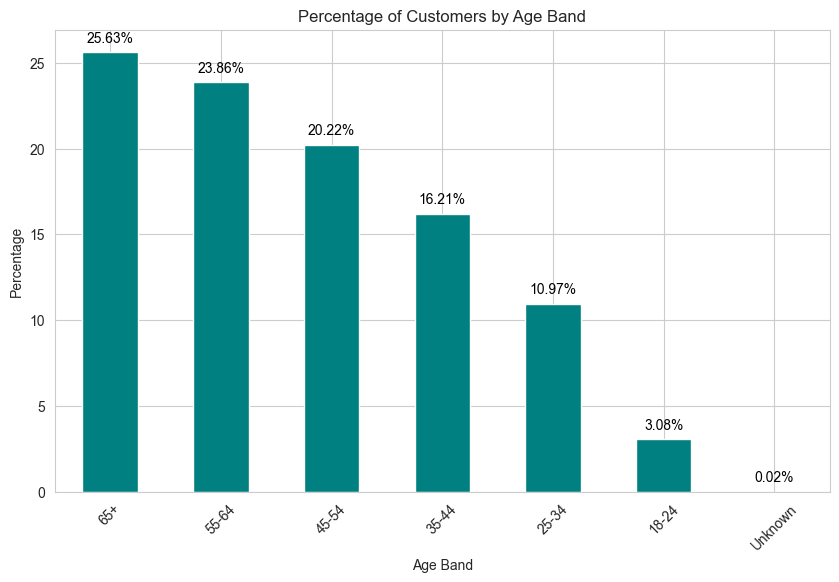

In [28]:
# Calculate the percentage of each AGE_BAND
age_band_percentage = df['AGE_BAND'].value_counts(normalize=True) * 100

# Plot for AGE_BAND percentages with annotations for percentages
plt.figure(figsize=(10, 6))
ax = age_band_percentage.plot(kind='bar', color='teal')
plt.title('Percentage of Customers by Age Band')
plt.xlabel('Age Band')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Annotate percentages above bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', rotation=0, xytext=(0, 10),
                textcoords='offset points')

plt.show()


Biểu đồ trình bày phân bố phần trăm khách hàng theo nhóm tuổi. Dưới đây là một số insights và nhận xét:

- **Nhóm tuổi 65+ và 55-64 chiếm ưu thế**: Những người ở độ tuổi nghỉ hưu hoặc gần nghỉ hưu có tỷ lệ cao nhất trong cơ sở khách hàng, với tổng cộng hơn 49%.
- **Giảm dần theo độ tuổi**: Tỷ lệ khách hàng giảm dần khi độ tuổi giảm, với nhóm 35-44 chiếm 20.22%, nhóm 25-34 chiếm 16.21%, và nhóm 18-24 chiếm 10.97%.
- **Nhóm tuổi trẻ ít tham gia hơn**: Phần trăm khách hàng trong độ tuổi từ 18 đến 24 tương đối thấp.
- **Không rõ ràng**: Một tỷ lệ rất nhỏ khách hàng không xác định tuổi tác.

Dựa trên những thông tin này, WA TAB có thể:

- **Tập trung vào khách hàng lớn tuổi**: Tối ưu hóa các sản phẩm và dịch vụ cho nhóm tuổi lớn, có thể là vì họ có nhiều thời gian rảnh rỗi và nguồn tài chính ổn định hơn.
- **Tăng cường tiếp cận với giới trẻ**: Phát triển sản phẩm và chiến dịch marketing để thu hút những khách hàng trẻ hơn, có thể thông qua việc sử dụng công nghệ và các nền tảng trực tuyến.
- **Chiến lược tùy chỉnh**: Xem xét đặc điểm và sở thích đặc trưng của từng nhóm tuổi để tạo ra các sản phẩm cá cược và chương trình khuyến mãi phù hợp.
- **Khám phá tiềm năng của các nhóm tuổi khác nhau**: Tìm hiểu xem liệu nhóm tuổi nào có khả năng chi tiêu cao hơn hoặc trung thành hơn với thương hiệu để tối ưu hóa doanh thu và giữ chân khách hàng.
- **Dữ liệu không rõ**: Cải thiện việc thu thập dữ liệu để giảm số lượng khách hàng với thông tin tuổi không rõ ràng, từ đó có cái nhìn rõ ràng hơn về cơ sở khách hàng và tối ưu hóa chiến lược.

Những insights này sẽ giúp WA TAB phát triển các chiến lược tiếp cận khách hàng mục tiêu và cung cấp dịch vụ cá cược một cách hiệu quả hơn.

### 3.1.8 Tickets

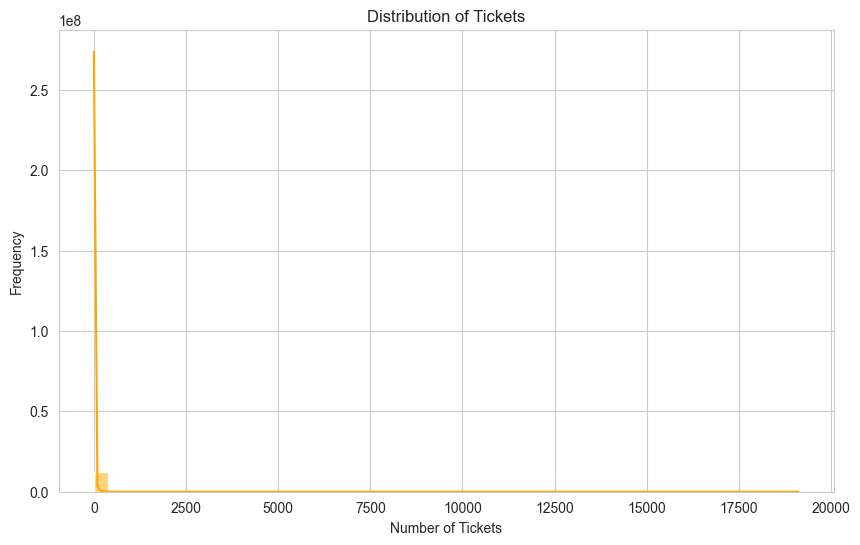

In [29]:
# Plot for TICKETS distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['TICKETS'], bins=50, kde=True, color='orange')
plt.title('Distribution of Tickets')
plt.xlabel('Number of Tickets')
plt.ylabel('Frequency')
plt.show()


### 3.1.10 BET_ACCOUNT_NUM_HASH

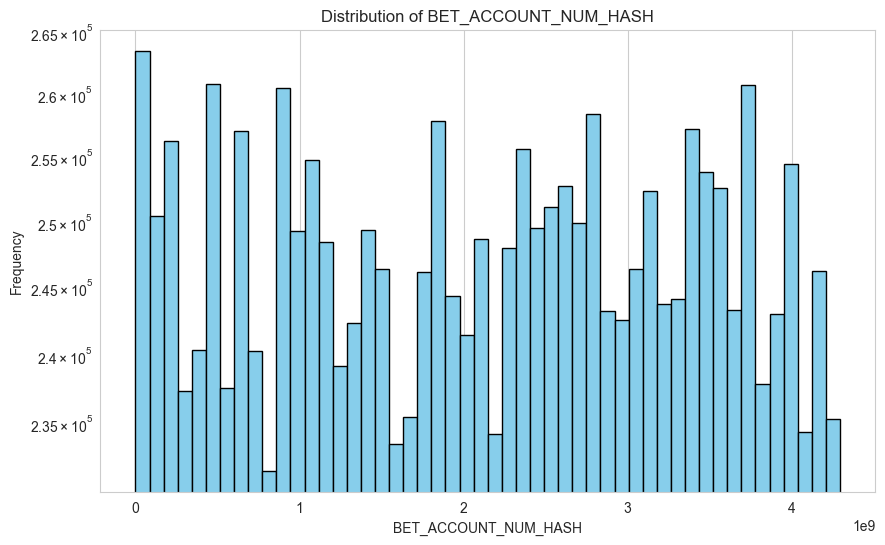

In [30]:
# Plotting the distribution of BET_ACCOUNT_NUM_HASH
plt.figure(figsize=(10, 6))
df['BET_ACCOUNT_NUM_HASH'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of BET_ACCOUNT_NUM_HASH')
plt.xlabel('BET_ACCOUNT_NUM_HASH')
plt.ylabel('Frequency')
plt.yscale('log') # Log scale for better visualization
plt.show()


### 3.1.11 GROSS_MARGIN

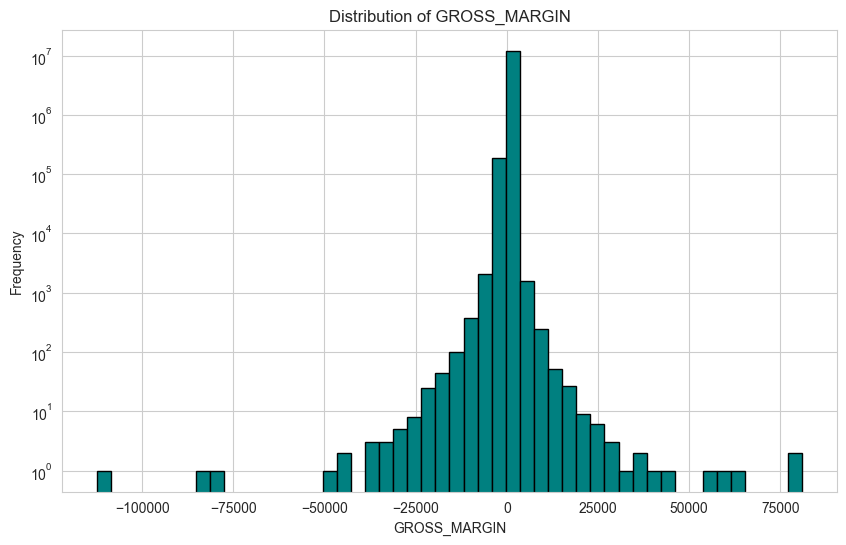

In [31]:
# Plotting the distribution of GROSS_MARGIN
plt.figure(figsize=(10, 6))
df['GROSS_MARGIN'].hist(bins=50, color='teal', edgecolor='black')
plt.title('Distribution of GROSS_MARGIN')
plt.xlabel('GROSS_MARGIN')
plt.ylabel('Frequency')
plt.yscale('log') # Log scale for better visualization of wide-ranging values
plt.show()


## 3.2 Correlation Visualization

### 3.2.1 Demographic Variables

#### 3.2.1.1 Age and Total Turnover:

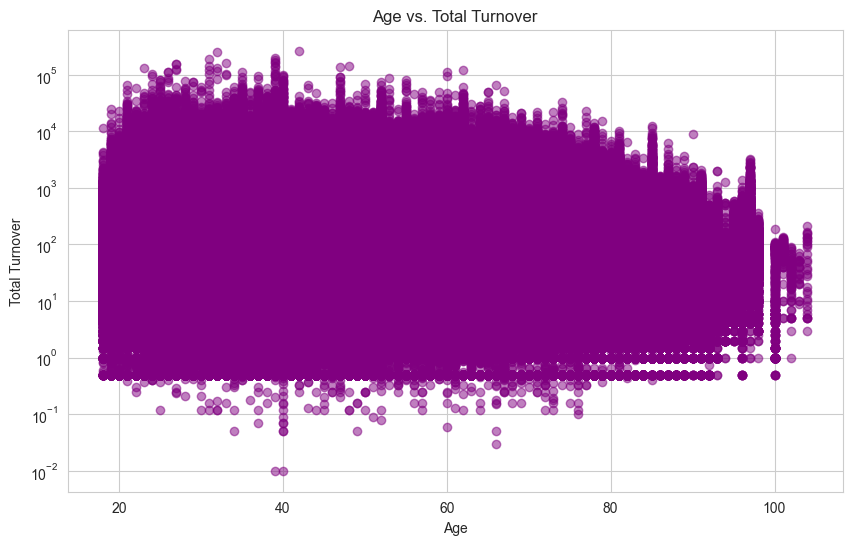

In [32]:
# Plotting the relationship between Age and Total Turnover
plt.figure(figsize=(10, 6))
plt.scatter(df['AGE'], df['TOTAL_TURNOVER'], alpha=0.5, color='purple')
plt.title('Age vs. Total Turnover')
plt.xlabel('Age')
plt.ylabel('Total Turnover')
plt.yscale('log') # Using log scale for Total Turnover for better visualization
plt.show()


#### 3.2.1.2 Gender and Total Turnover:

C:\Users\thanh\AppData\Local\Temp\ipykernel_5376\2467943460.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, value, f'{percentages[i]:.2f}%', ha='center', va='bottom')


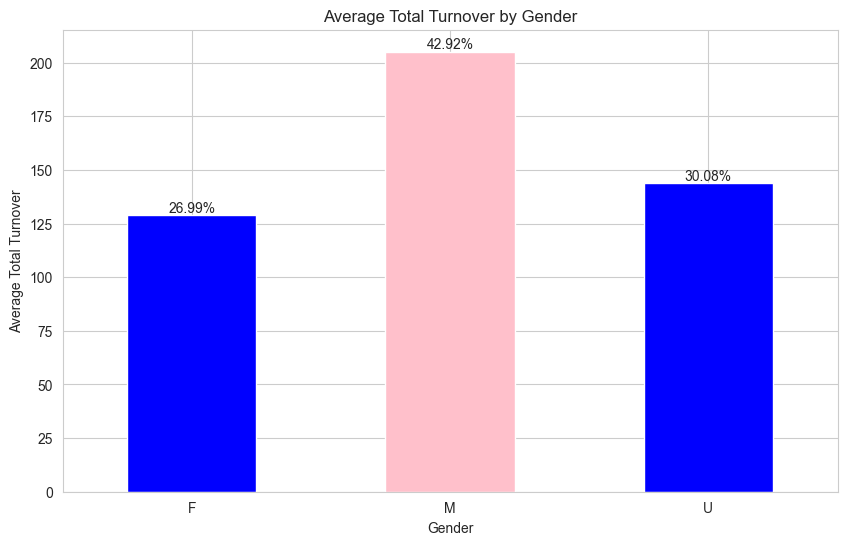

In [33]:


# Calculating mean total turnover by gender
gender_turnover_means = df.groupby('GENDER')['TOTAL_TURNOVER'].mean()

# Plotting
ax = gender_turnover_means.plot(kind='bar', color=['blue', 'pink'], figsize=(10, 6))
plt.title('Average Total Turnover by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Total Turnover')
plt.xticks(rotation=0)  # Keep the gender labels horizontal for clarity

# Calculating and adding percentages on top of each bar
total_turnover = gender_turnover_means.sum()
percentages = (gender_turnover_means / total_turnover) * 100

# Adding the percentages above the bars
for i, value in enumerate(gender_turnover_means):
    plt.text(i, value, f'{percentages[i]:.2f}%', ha='center', va='bottom')

plt.show()


#### 3.2.1.3 RESIDENTIAL_STATE vs total turn over

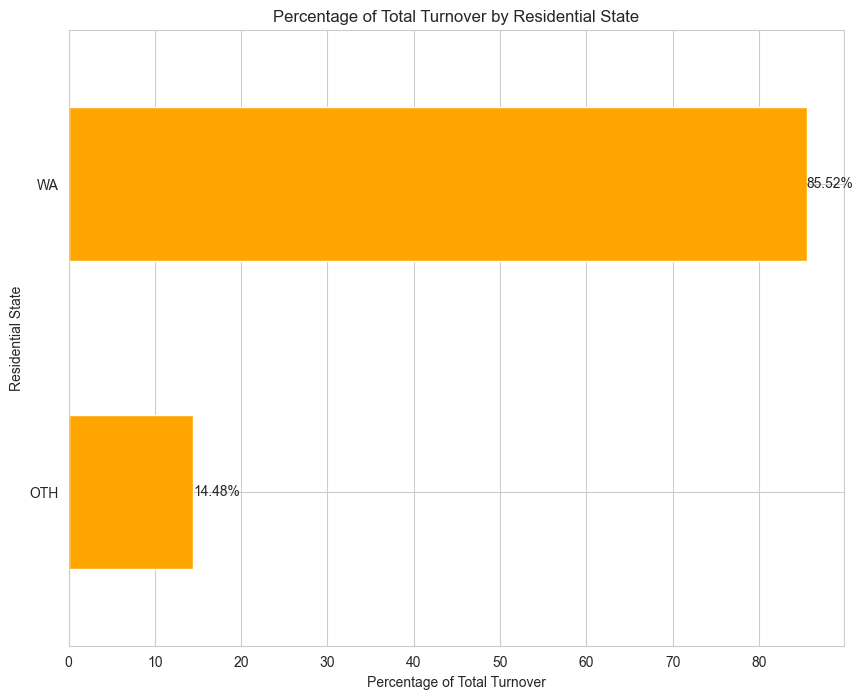

In [34]:

# Calculating the total turnover for all states combined to find percentages
total_turnover_all_states = df['TOTAL_TURNOVER'].sum()

# Calculating the total turnover by state again for consistency with previous step
total_turnover_by_state = df.groupby('RESIDENTIAL_STATE')['TOTAL_TURNOVER'].sum()

# Calculating the percentage of total turnover by state
percentage_turnover_by_state = (total_turnover_by_state / total_turnover_all_states) * 100

# Sorting values for better visualization
percentage_turnover_by_state_sorted = percentage_turnover_by_state.sort_values()

# Plotting
ax = percentage_turnover_by_state_sorted.plot(kind='barh', figsize=(10, 8), color='orange')
plt.title('Percentage of Total Turnover by Residential State')
plt.xlabel('Percentage of Total Turnover')
plt.ylabel('Residential State')

# Adding the percentages next to each bar
for i, value in enumerate(percentage_turnover_by_state_sorted):
    plt.text(value, i, f'{value:.2f}%', va='center')

plt.show()


#### 3.2.1.4 day of week vs total turn over

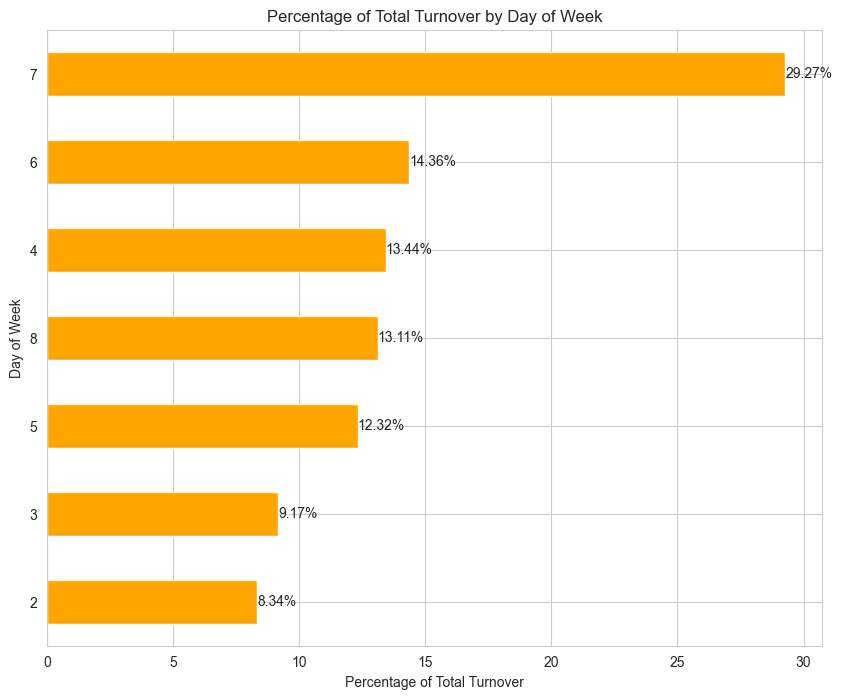

In [35]:

# Calculating the total turnover for all states combined to find percentages
total_turnover_all_states = df['TOTAL_TURNOVER'].sum()

# Calculating the total turnover by state again for consistency with previous step
total_turnover_by_day_of_week = df.groupby('DAY_OF_WEEK')['TOTAL_TURNOVER'].sum()

# Calculating the percentage of total turnover by state
percentage_turnover_by_day_of_week = (total_turnover_by_day_of_week / total_turnover_all_states) * 100

# Sorting values for better visualization
percentage_turnover_by_dayofweek_sorted = percentage_turnover_by_day_of_week.sort_values()

# Plotting
ax = percentage_turnover_by_dayofweek_sorted.plot(kind='barh', figsize=(10, 8), color='orange')
plt.title('Percentage of Total Turnover by Day of Week')
plt.xlabel('Percentage of Total Turnover')
plt.ylabel('Day of Week')

# Adding the percentages next to each bar
for i, value in enumerate(percentage_turnover_by_dayofweek_sorted):
    plt.text(value, i, f'{value:.2f}%', va='center')

plt.show()


### 3.2.2 Betting Behavior

#### 3.2.2.1 FOB Racing vs. Total Turnover:

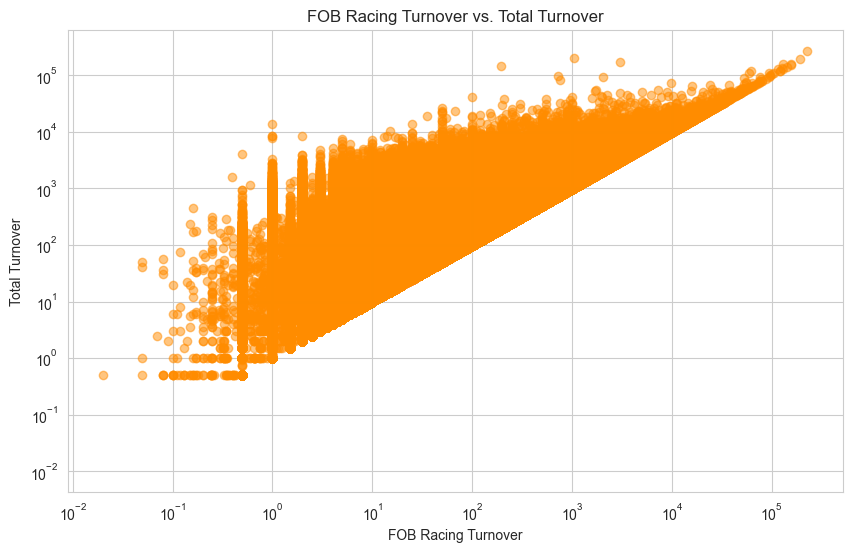

In [36]:
# Plotting the relationship between FOB Racing Turnover and Total Turnover
plt.figure(figsize=(10, 6))
plt.scatter(df['FOB_RACING_TURNOVER'], df['TOTAL_TURNOVER'], alpha=0.5, color='darkorange')
plt.title('FOB Racing Turnover vs. Total Turnover')
plt.xlabel('FOB Racing Turnover')
plt.ylabel('Total Turnover')
plt.xscale('log') # Using log scale for FOB Racing Turnover for better visualization
plt.yscale('log') # Using log scale for Total Turnover for better visualization
plt.show()


#### 3.2.2.2 FOB Sport vs. Total Turnover:

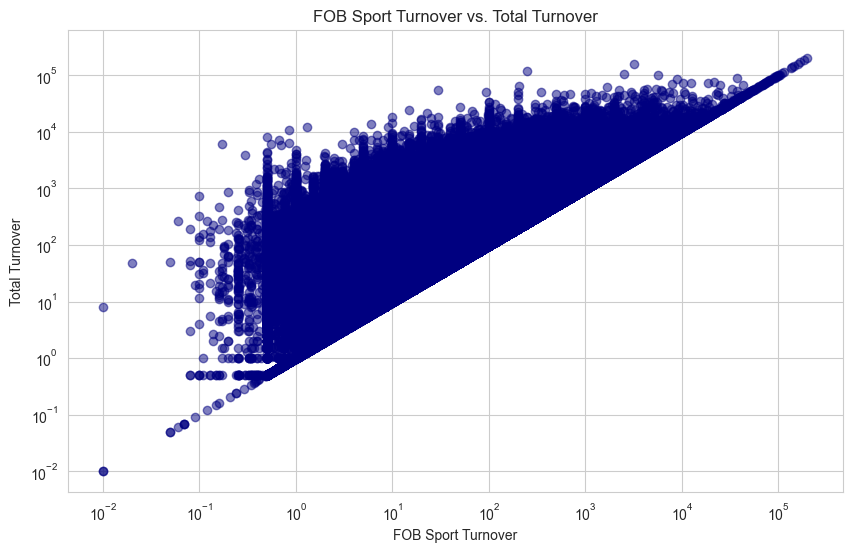

In [37]:
# Plotting the relationship between FOB Sport Turnover and Total Turnover
plt.figure(figsize=(10, 6))
plt.scatter(df['FOB_SPORT_TURNOVER'], df['TOTAL_TURNOVER'], alpha=0.5, color='navy')
plt.title('FOB Sport Turnover vs. Total Turnover')
plt.xlabel('FOB Sport Turnover')
plt.ylabel('Total Turnover')
plt.xscale('log') # Using log scale for FOB Sport Turnover for better visualization
plt.yscale('log') # Using log scale for Total Turnover for better visualization
plt.show()


#### 3.2.2.3 Pari Racing vs. Total Turnover:

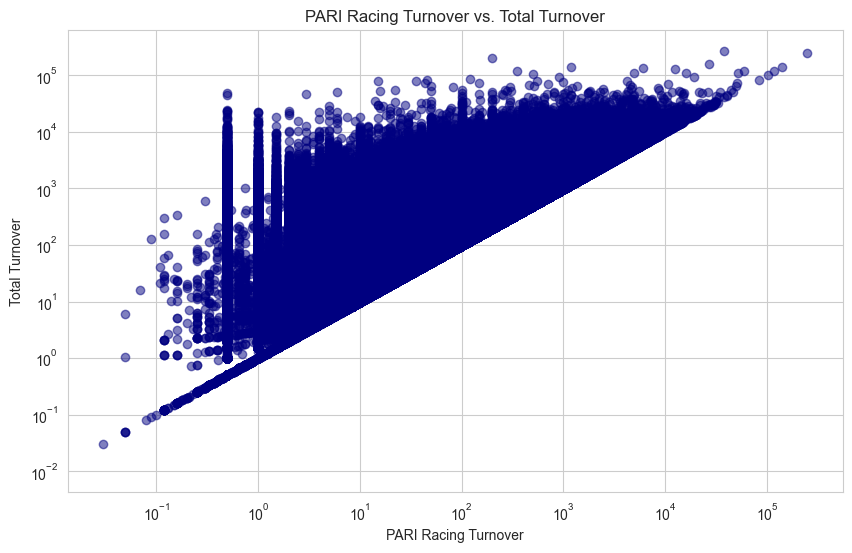

In [38]:
# Plotting the relationship between FOB Sport Turnover and Total Turnover
plt.figure(figsize=(10, 6))
plt.scatter(df['PARI_RACING_TURNOVER'], df['TOTAL_TURNOVER'], alpha=0.5, color='navy')
plt.title('PARI Racing Turnover vs. Total Turnover')
plt.xlabel('PARI Racing Turnover')
plt.ylabel('Total Turnover')
plt.xscale('log') # Using log scale for FOB Sport Turnover for better visualization
plt.yscale('log') # Using log scale for Total Turnover for better visualization
plt.show()


#### 3.2.2.4 Pari Sport vs. Total Turnover:

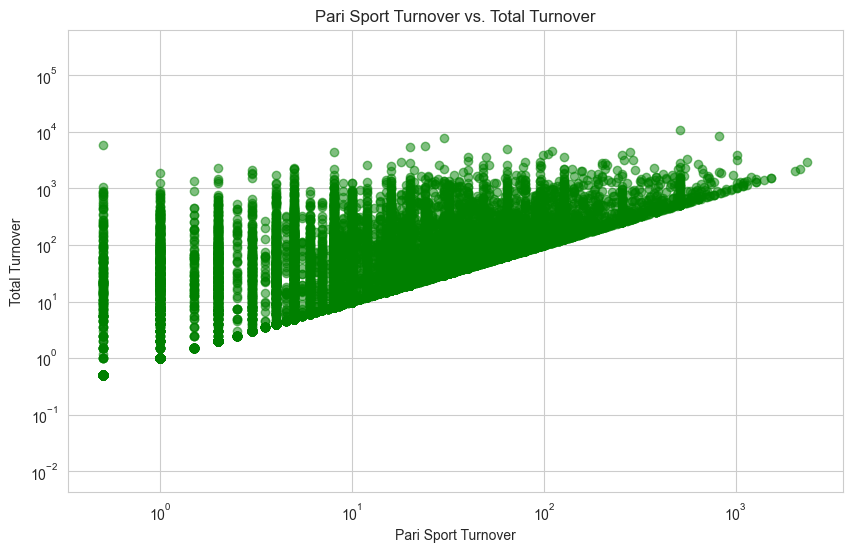

In [39]:
# Plotting the relationship between Pari Sport Turnover and Total Turnover
plt.figure(figsize=(10, 6))
plt.scatter(df['PARI_SPORT_TURNOVER'], df['TOTAL_TURNOVER'], alpha=0.5, color='green')
plt.title('Pari Sport Turnover vs. Total Turnover')
plt.xlabel('Pari Sport Turnover')
plt.ylabel('Total Turnover')
plt.xscale('log') # Using log scale for Pari Sport Turnover for better visualization
plt.yscale('log') # Using log scale for Total Turnover for better visualization
plt.show()


### 3.2.3 Customer Loyalty and Engagement

#### 3.2.3.1 Tenure and Total Turnover:

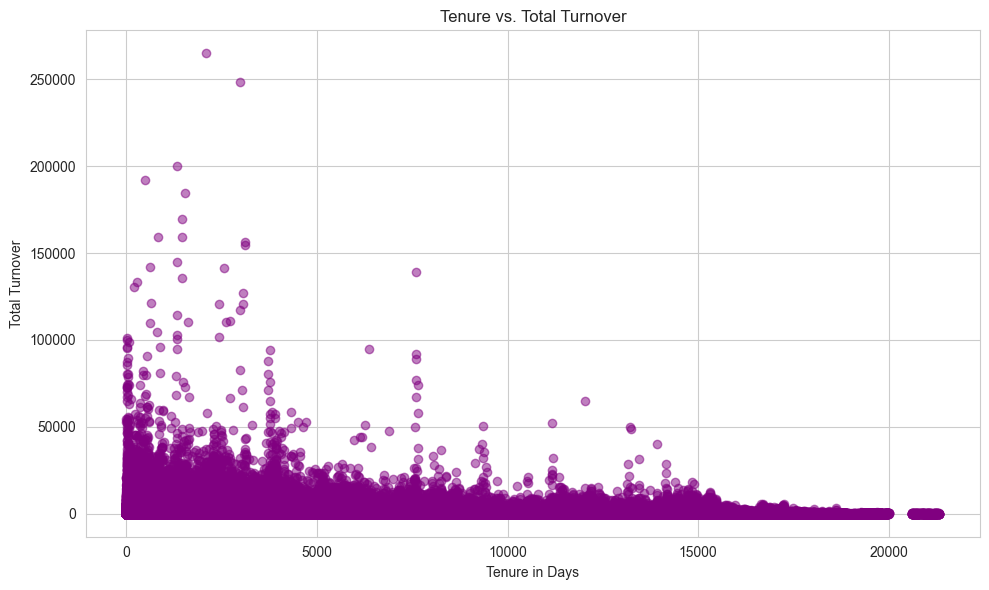

In [40]:
# Scatter plot for Tenure vs. Total Turnover
plt.figure(figsize=(10, 6))
plt.scatter(df['TENURE_IN_DAYS'], df['TOTAL_TURNOVER'], alpha=0.5, color='purple')
plt.title('Tenure vs. Total Turnover')
plt.xlabel('Tenure in Days')
plt.ylabel('Total Turnover')
plt.grid(True)
plt.tight_layout()

plt.show()


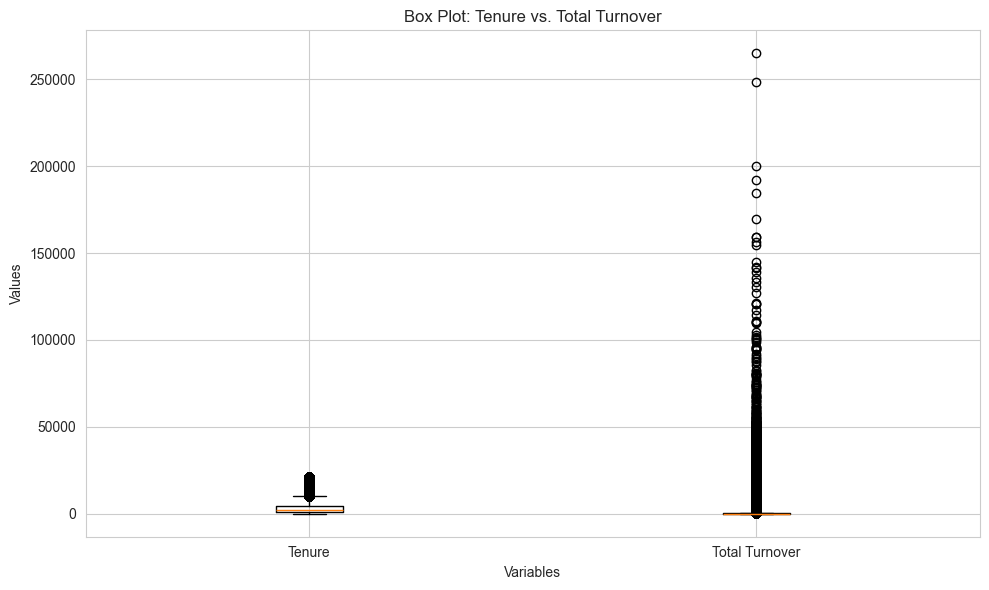

In [41]:
plt.figure(figsize=(10, 6))
plt.boxplot([df['TENURE_IN_DAYS'], df['TOTAL_TURNOVER']], labels=['Tenure', 'Total Turnover'])
plt.title('Box Plot: Tenure vs. Total Turnover')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.grid(True)
plt.tight_layout()

plt.show()


### 3.2.4 Financial Outcomes

#### 3.2.4.1 Gross Margin and Total Turnover: 

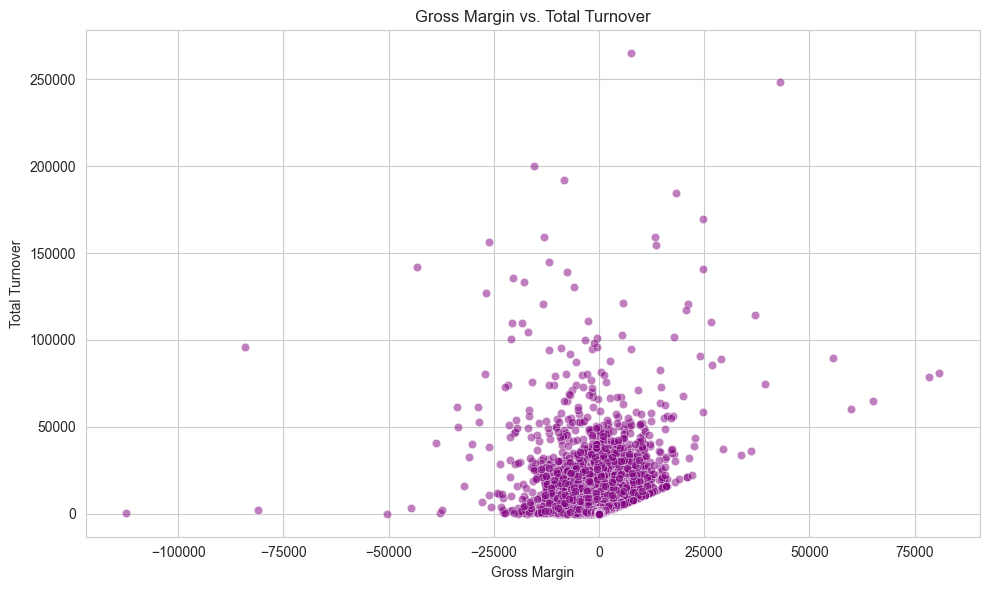

Correlation Coefficient between Gross Margin and Total Turnover: 0.14263673830570928


In [42]:


# Scatter plot for Gross Margin vs. Total Turnover
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GROSS_MARGIN', y='TOTAL_TURNOVER', color='purple', alpha=0.5)
plt.title('Gross Margin vs. Total Turnover')
plt.xlabel('Gross Margin')
plt.ylabel('Total Turnover')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate and display the correlation coefficient
correlation_coefficient = df['GROSS_MARGIN'].corr(df['TOTAL_TURNOVER'])
print("Correlation Coefficient between Gross Margin and Total Turnover:", correlation_coefficient)


#### 3.2.4.2 Dividends Paid and Total Turnover: 

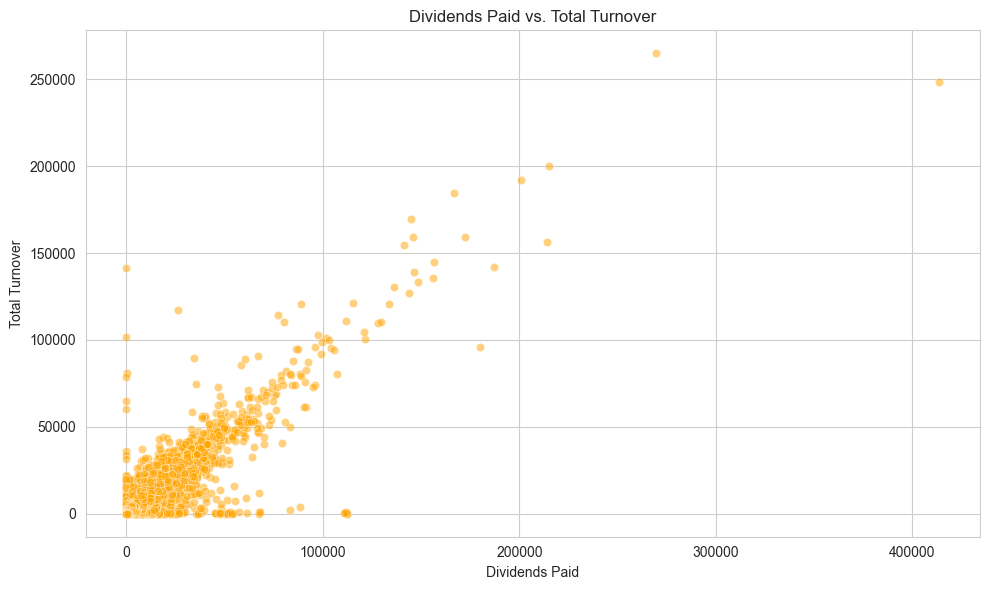

Correlation Coefficient between Dividends Paid and Total Turnover: 0.8991408993835722


In [43]:
# Scatter plot for Dividends Paid vs. Total Turnover
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='DIVIDENDS_PAID', y='TOTAL_TURNOVER', color='orange', alpha=0.5)
plt.title('Dividends Paid vs. Total Turnover')
plt.xlabel('Dividends Paid')
plt.ylabel('Total Turnover')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate and display the correlation coefficient
correlation_coefficient = df['DIVIDENDS_PAID'].corr(df['TOTAL_TURNOVER'])
print("Correlation Coefficient between Dividends Paid and Total Turnover:", correlation_coefficient)

#### 3.2.4.3 Tickets and Total Turnover

In [44]:
'''# Tính toán cross-correlation giữa TICKETS và Total Turnover
cross_corr = np.correlate(df['TICKETS'], df['TOTAL_TURNOVER'], mode='same')

# Tạo biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(df['DATE_DIM'], cross_corr, color='blue')
plt.title('Cross-correlation between TICKETS and Total Turnover')
plt.xlabel('Date')
plt.ylabel('Cross-correlation')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
'''

"# Tính toán cross-correlation giữa TICKETS và Total Turnover\ncross_corr = np.correlate(df['TICKETS'], df['TOTAL_TURNOVER'], mode='same')\n\n# Tạo biểu đồ\nplt.figure(figsize=(12, 6))\nplt.plot(df['DATE_DIM'], cross_corr, color='blue')\nplt.title('Cross-correlation between TICKETS and Total Turnover')\nplt.xlabel('Date')\nplt.ylabel('Cross-correlation')\nplt.grid(True)\nplt.xticks(rotation=45)\nplt.tight_layout()\nplt.show()\n"

## 3.2 Times Series

### 3.2.1   FOB_RACING_TURNOVER vs DIM_DATE

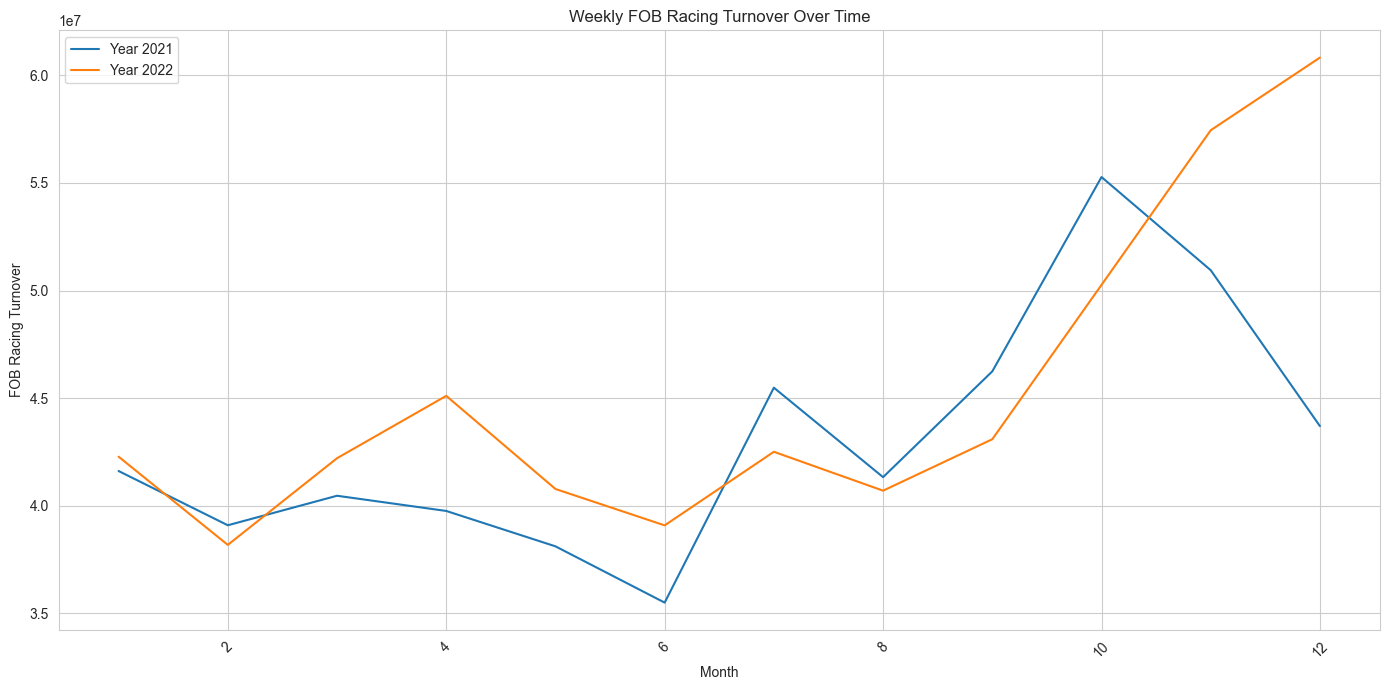

In [118]:
import matplotlib.pyplot as plt

# Aggregate FOB_RACING_TURNOVER by week and year
fob_racing_turnover_weekly = df.groupby(['Year', 'Month'])['FOB_RACING_TURNOVER'].sum()

# Plot the time series of FOB_RACING_TURNOVER by week and year
plt.figure(figsize=(14, 7))

# Lặp qua từng năm trong dữ liệu
for year in sorted(df['Year'].unique()):
    # Kiểm tra xem năm có trong dữ liệu không
    if year in fob_racing_turnover_weekly.index.levels[0]:
        plt.plot(fob_racing_turnover_weekly[year], label=f'Year {year}')

plt.title('Weekly FOB Racing Turnover Over Time')
plt.xlabel('Month')
plt.ylabel('FOB Racing Turnover')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


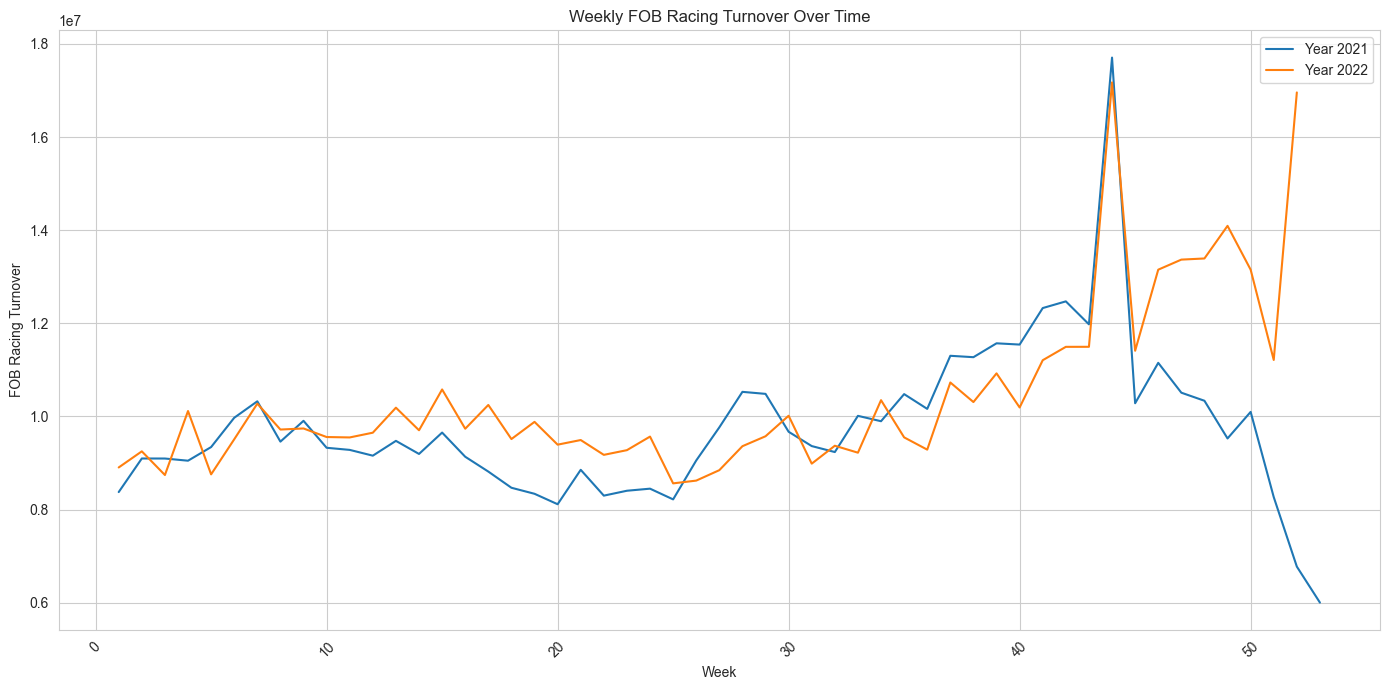

In [119]:


# Aggregate FOB_RACING_TURNOVER by week and year
fob_racing_turnover_weekly = df.groupby(['Year', 'Week'])['FOB_RACING_TURNOVER'].sum()

# Plot the time series of FOB_RACING_TURNOVER by week and year
plt.figure(figsize=(14, 7))
for year in df['Year'].unique():
    plt.plot(fob_racing_turnover_weekly[year].index, fob_racing_turnover_weekly[year].values, label=f'Year {year}')

plt.title('Weekly FOB Racing Turnover Over Time')
plt.xlabel('Week')
plt.ylabel('FOB Racing Turnover')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


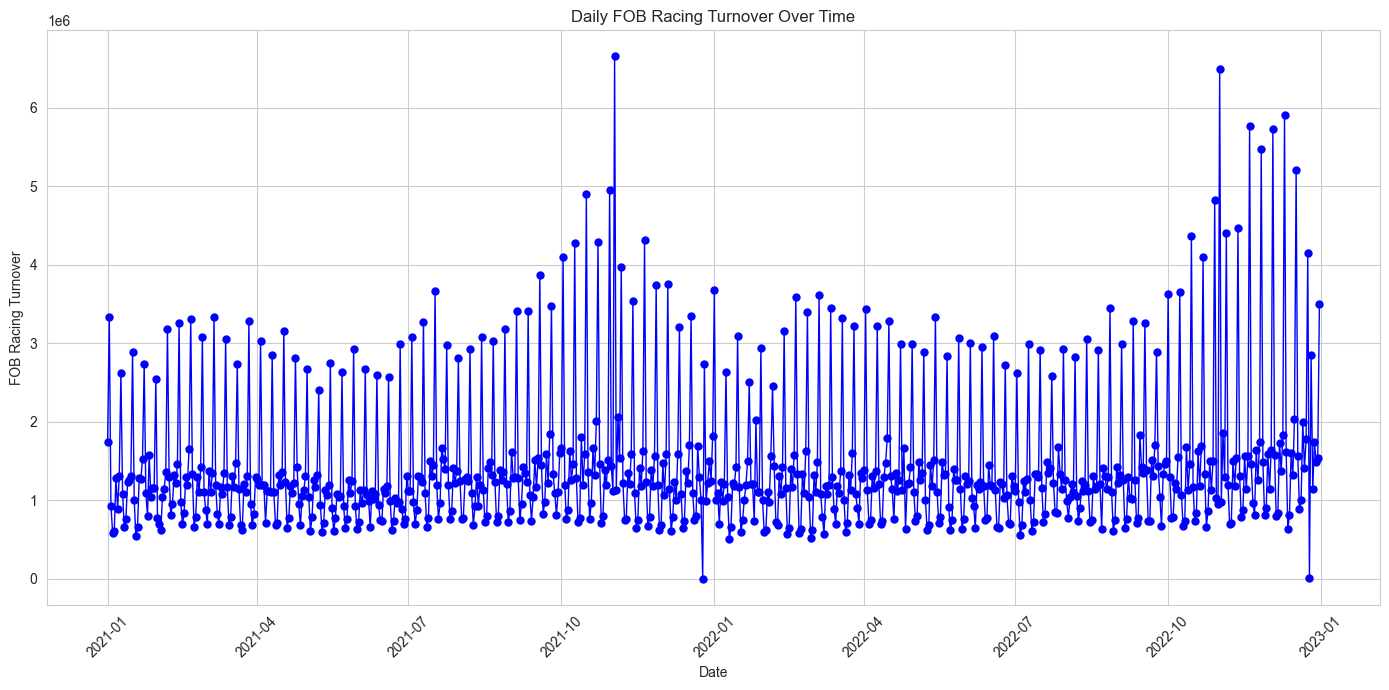

In [45]:
import matplotlib.pyplot as plt

# Aggregate FOB_RACING_TURNOVER by date
fob_racing_turnover_daily = df.groupby('DATE_DIM')['FOB_RACING_TURNOVER'].sum()

# Plot the time series of FOB_RACING_TURNOVER
plt.figure(figsize=(14, 7))
plt.plot(fob_racing_turnover_daily.index, fob_racing_turnover_daily.values, color='blue', marker='o', linestyle='-', linewidth=1, markersize=5)
plt.title('Daily FOB Racing Turnover Over Time')
plt.xlabel('Date')
plt.ylabel('FOB Racing Turnover')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()


### 3.2.2 TOTAL FOB_SPORT_TURNOVER vs DIM_DATE

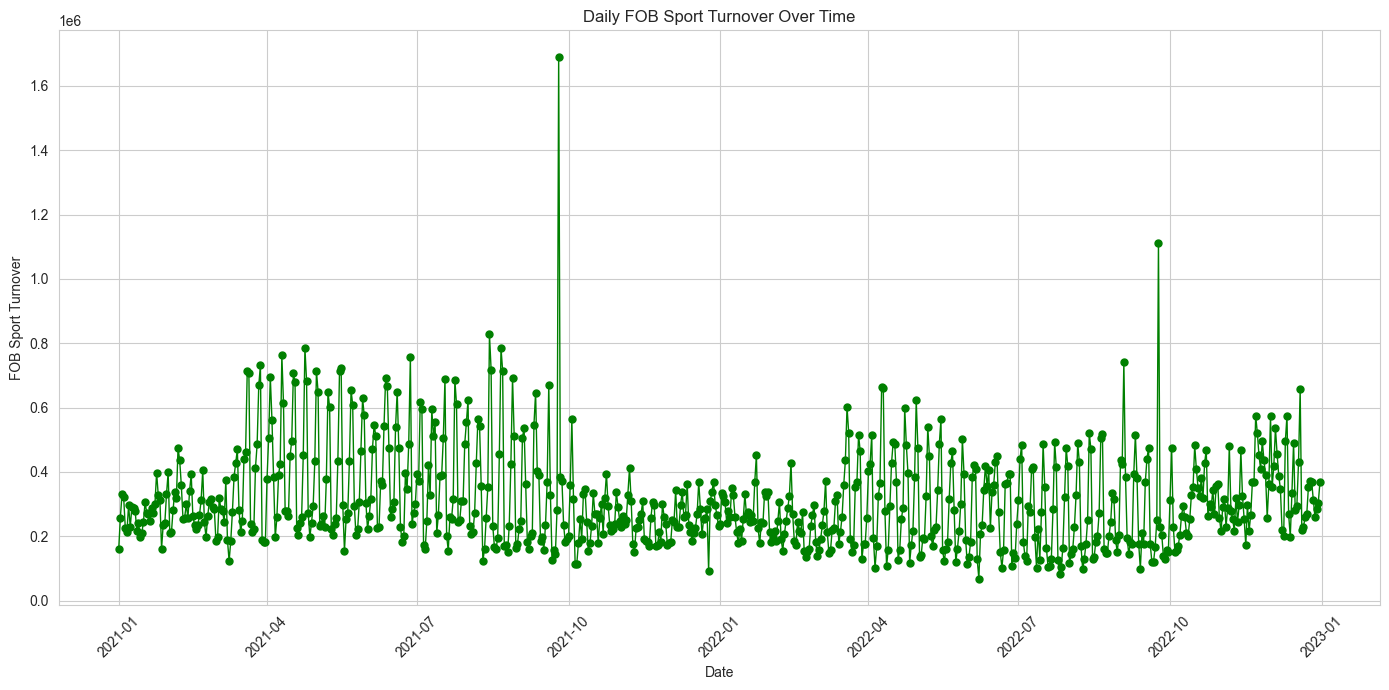

In [46]:
# Aggregate FOB_SPORT_TURNOVER by date
fob_sport_turnover_daily = df.groupby('DATE_DIM')['FOB_SPORT_TURNOVER'].sum()

# Plot the time series of FOB_SPORT_TURNOVER
plt.figure(figsize=(14, 7))
plt.plot(fob_sport_turnover_daily.index, fob_sport_turnover_daily.values, color='green', marker='o', linestyle='-', linewidth=1, markersize=5)
plt.title('Daily FOB Sport Turnover Over Time')
plt.xlabel('Date')
plt.ylabel('FOB Sport Turnover')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()


### 3.2.3 TOTAL PARI_RACING_TURNOVER vs DIM_DATE

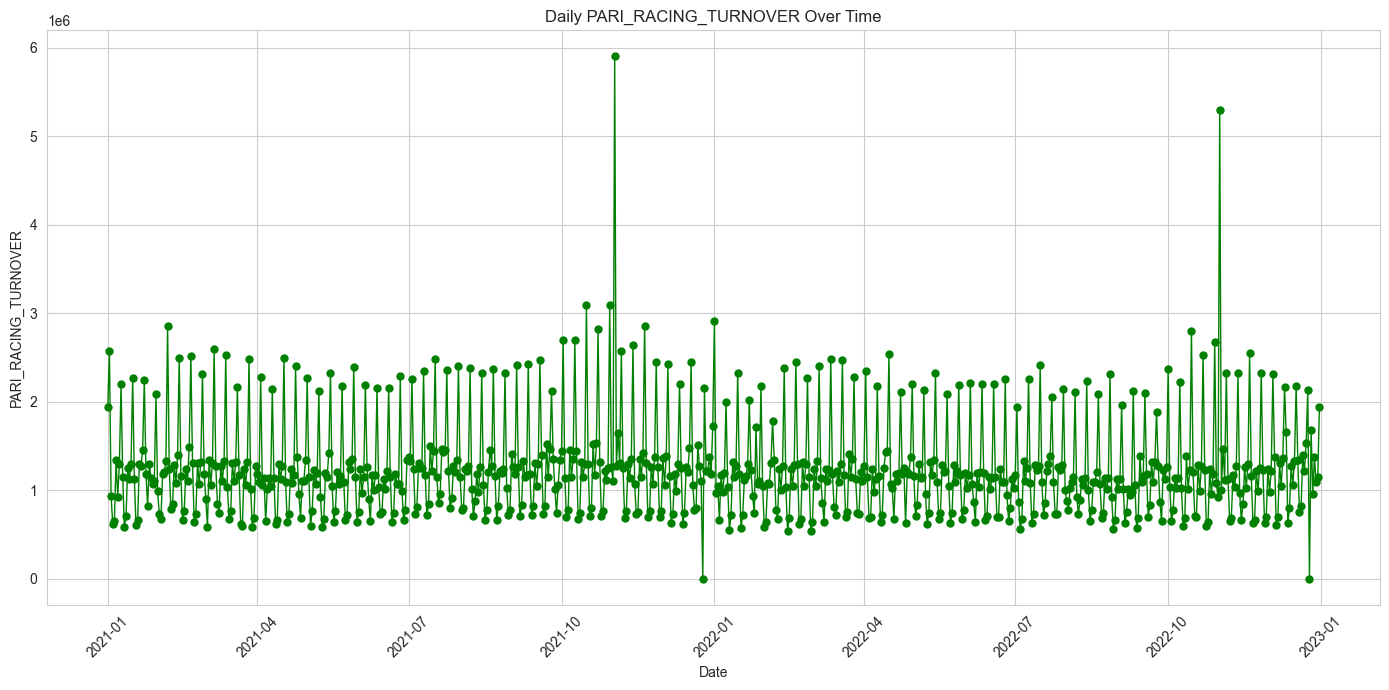

In [47]:
# Aggregate PARI_RACING_TURNOVER by date
PARI_RACING_TURNOVER_daily = df.groupby('DATE_DIM')['PARI_RACING_TURNOVER'].sum()

# Plot the time series of PARI_RACING_TURNOVER
plt.figure(figsize=(14, 7))
plt.plot(PARI_RACING_TURNOVER_daily.index, PARI_RACING_TURNOVER_daily.values, color='green', marker='o', linestyle='-', linewidth=1, markersize=5)
plt.title('Daily PARI_RACING_TURNOVER Over Time')
plt.xlabel('Date')
plt.ylabel('PARI_RACING_TURNOVER')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()


### 3.2.4 TOTAL PARI_SPORT_TURNOVER vs DIM_DATE

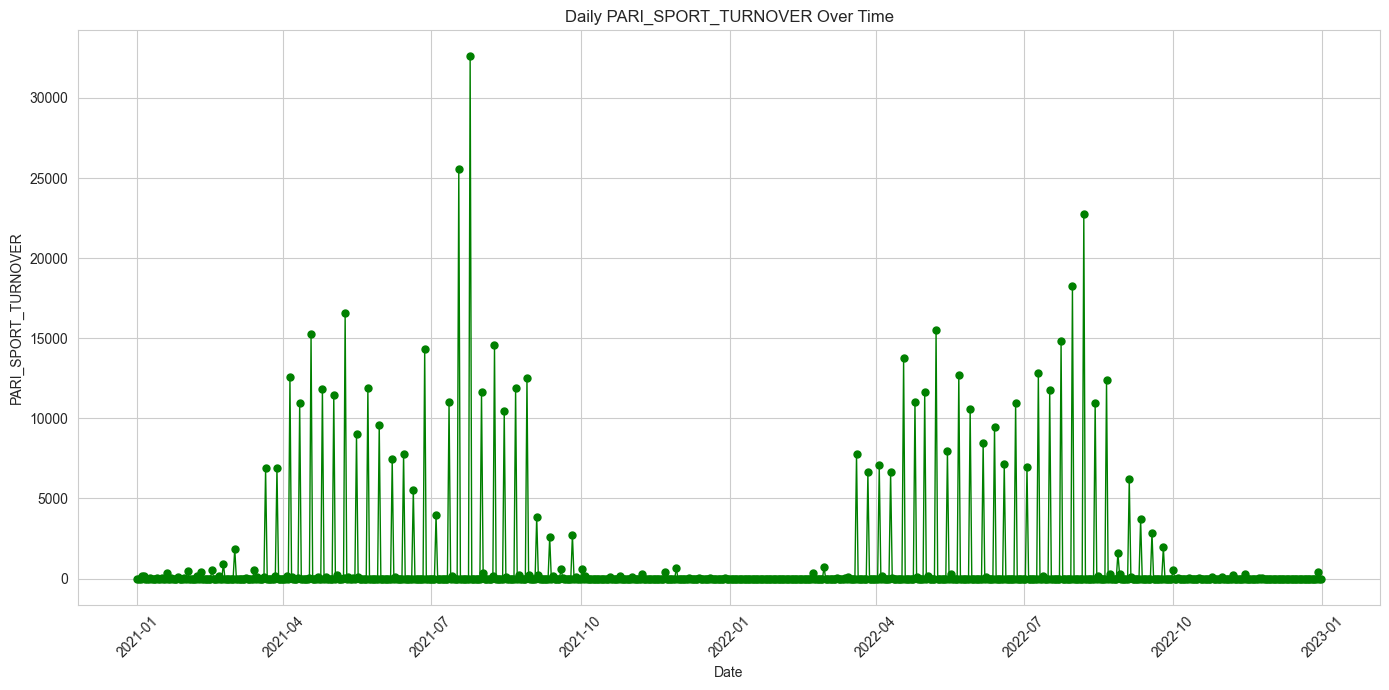

In [48]:
# Aggregate PARI_SPORT_TURNOVER by date
PARI_SPORT_TURNOVER_daily = df.groupby('DATE_DIM')['PARI_SPORT_TURNOVER'].sum()

# Plot the time series of PARI_SPORT_TURNOVER
plt.figure(figsize=(14, 7))
plt.plot(PARI_SPORT_TURNOVER_daily.index, PARI_SPORT_TURNOVER_daily.values, color='green', marker='o', linestyle='-', linewidth=1, markersize=5)
plt.title('Daily PARI_SPORT_TURNOVER Over Time')
plt.xlabel('Date')
plt.ylabel('PARI_SPORT_TURNOVER')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()


### 3.2.5 TOTAL_TURNOVER vs DIM_DATE

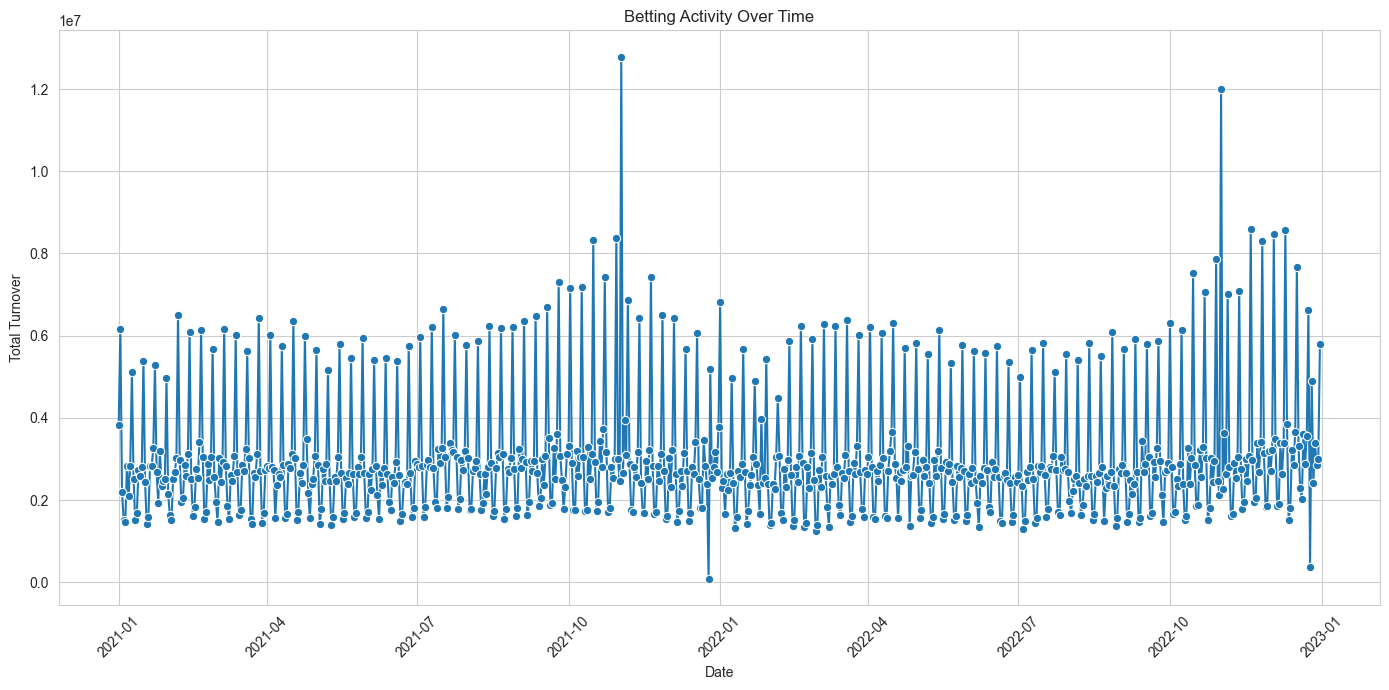

In [49]:

# Aggregate data by DATE_DIM to get total turnover per day
daily_turnover = df.groupby('DATE_DIM')['TOTAL_TURNOVER'].sum().reset_index()

# Plotting the trend of Total Turnover over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='DATE_DIM', y='TOTAL_TURNOVER', data=daily_turnover, marker='o')
plt.title('Betting Activity Over Time')
plt.xlabel('Date')
plt.ylabel('Total Turnover')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3.2.6 TOTAL DIVIDENDS_PAID vs DIM_DATE

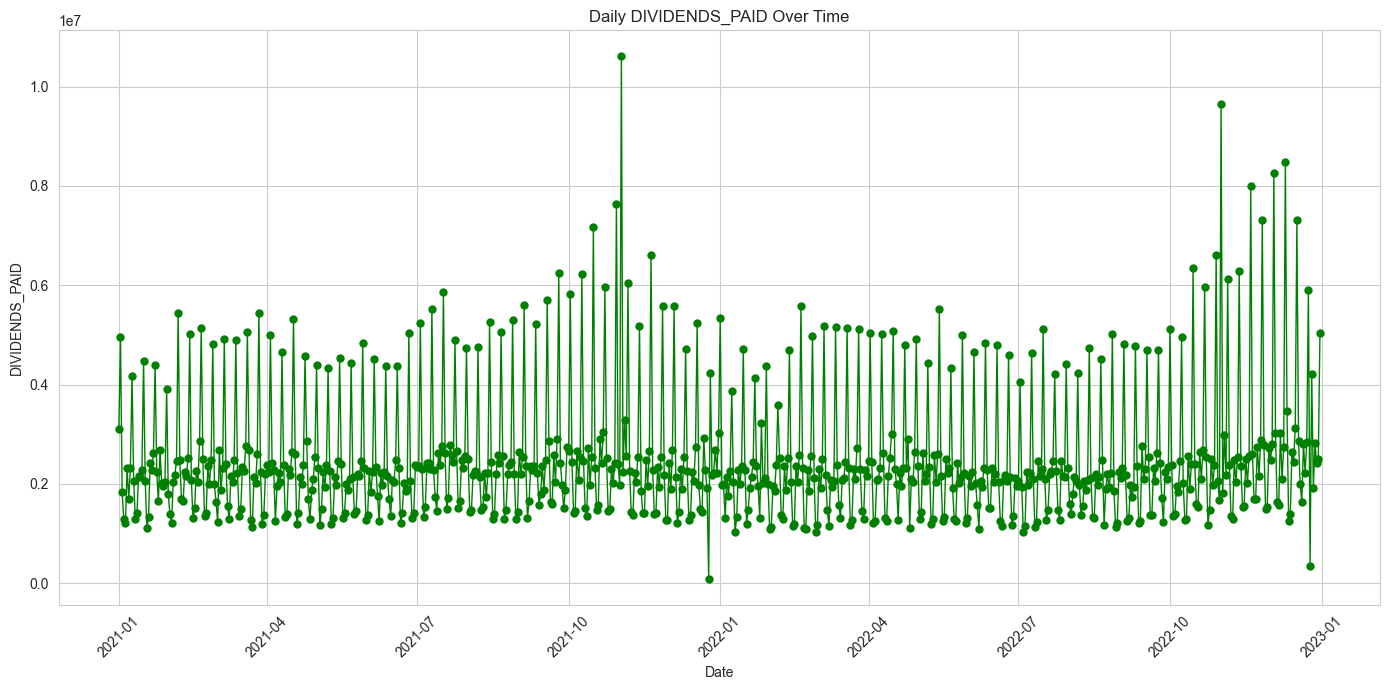

In [50]:
# Aggregate DIVIDENDS_PAID by date
DIVIDENDS_PAID_daily = df.groupby('DATE_DIM')['DIVIDENDS_PAID'].sum()

# Plot the time series of DIVIDENDS_PAID
plt.figure(figsize=(14, 7))
plt.plot(DIVIDENDS_PAID_daily.index, DIVIDENDS_PAID_daily.values, color='green', marker='o', linestyle='-', linewidth=1, markersize=5)
plt.title('Daily DIVIDENDS_PAID Over Time')
plt.xlabel('Date')
plt.ylabel('DIVIDENDS_PAID')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()


### 3.2.7 TOTAL GROSS_MARGIN vs DIM_DATE

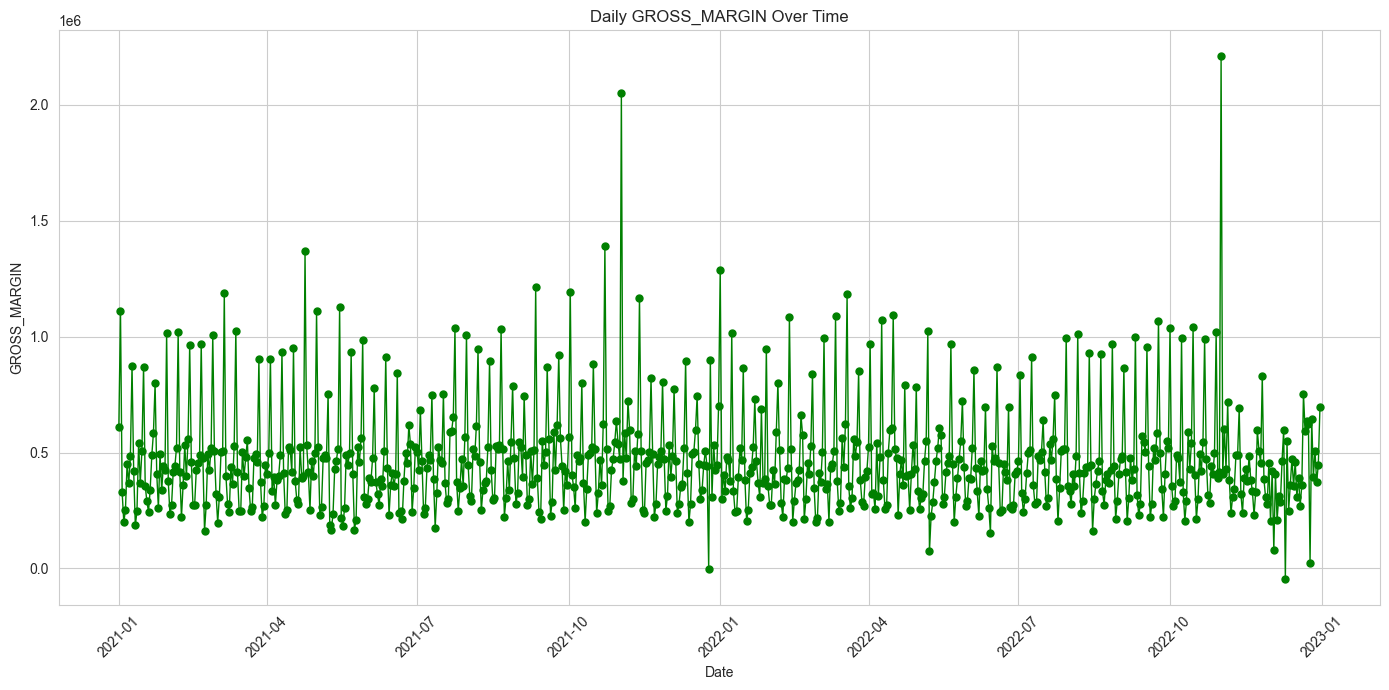

In [51]:
# Aggregate GROSS_MARGIN by date
GROSS_MARGIN_daily = df.groupby('DATE_DIM')['GROSS_MARGIN'].sum()

# Plot the time series of GROSS_MARGIN
plt.figure(figsize=(14, 7))
plt.plot(GROSS_MARGIN_daily.index, GROSS_MARGIN_daily.values, color='green', marker='o', linestyle='-', linewidth=1, markersize=5)
plt.title('Daily GROSS_MARGIN Over Time')
plt.xlabel('Date')
plt.ylabel('GROSS_MARGIN')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()


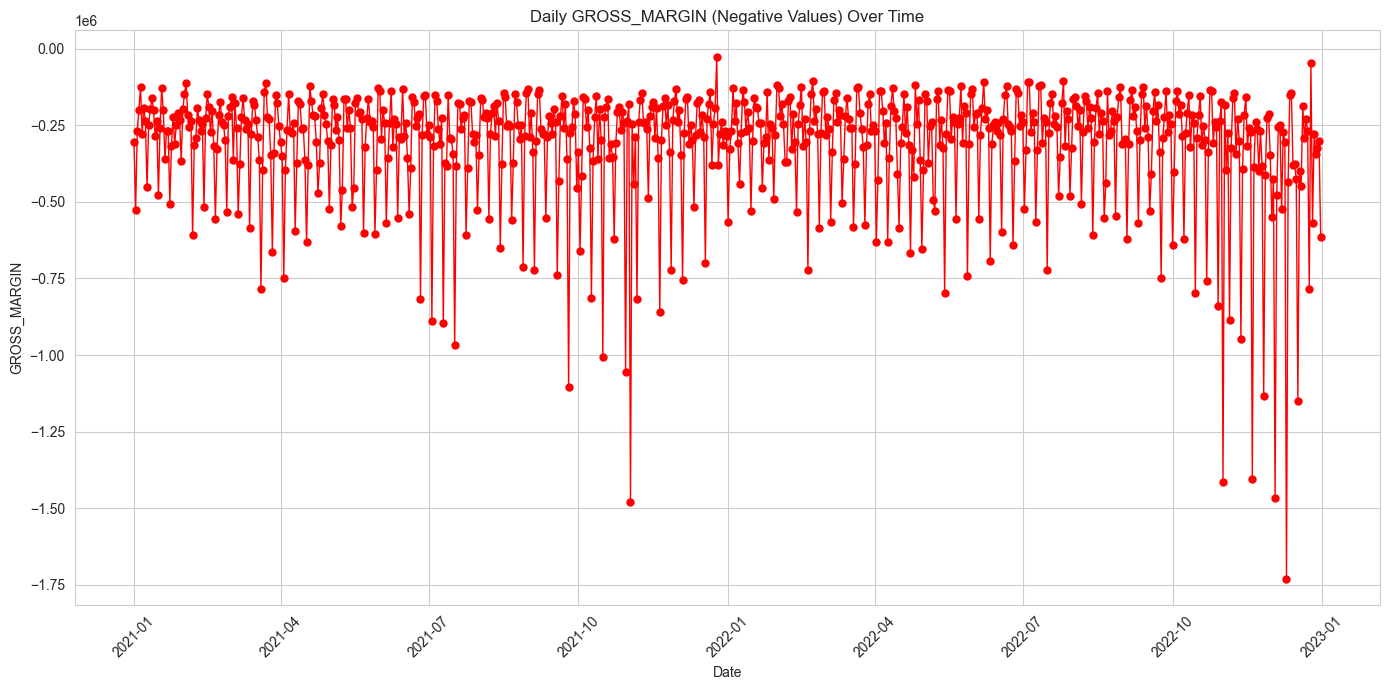

In [52]:
# Lọc dữ liệu theo điều kiện gross margin < 0
df_negative_gross_margin = df[df['GROSS_MARGIN'] < 0]

# Aggregate GROSS_MARGIN by date for the filtered data
GROSS_MARGIN_daily_negative = df_negative_gross_margin.groupby('DATE_DIM')['GROSS_MARGIN'].sum()

# Plot the time series of GROSS_MARGIN with negative values
plt.figure(figsize=(14, 7))
plt.plot(GROSS_MARGIN_daily_negative.index, GROSS_MARGIN_daily_negative.values, color='red', marker='o', linestyle='-', linewidth=1, markersize=5)
plt.title('Daily GROSS_MARGIN (Negative Values) Over Time')
plt.xlabel('Date')
plt.ylabel('GROSS_MARGIN')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


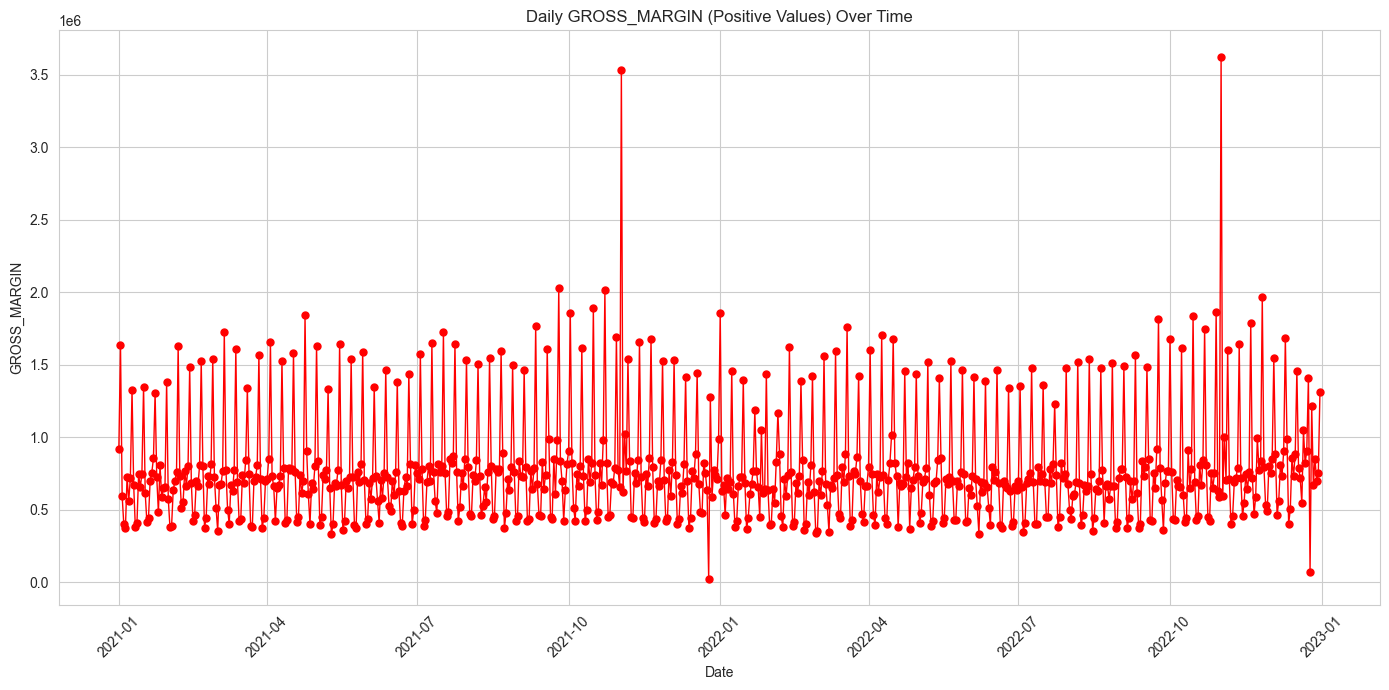

In [53]:
# Lọc dữ liệu theo điều kiện gross margin > 0
df_positive_gross_margin = df[df['GROSS_MARGIN'] > 0]

# Aggregate GROSS_MARGIN by date for the filtered data
GROSS_MARGIN_daily_positive = df_positive_gross_margin.groupby('DATE_DIM')['GROSS_MARGIN'].sum()

# Plot the time series of GROSS_MARGIN with negative values
plt.figure(figsize=(14, 7))
plt.plot(GROSS_MARGIN_daily_positive.index, GROSS_MARGIN_daily_positive.values, color='red', marker='o', linestyle='-', linewidth=1, markersize=5)
plt.title('Daily GROSS_MARGIN (Positive Values) Over Time')
plt.xlabel('Date')
plt.ylabel('GROSS_MARGIN')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


### 3.2.8 TOTAL TICKETS vs DIM_DATE

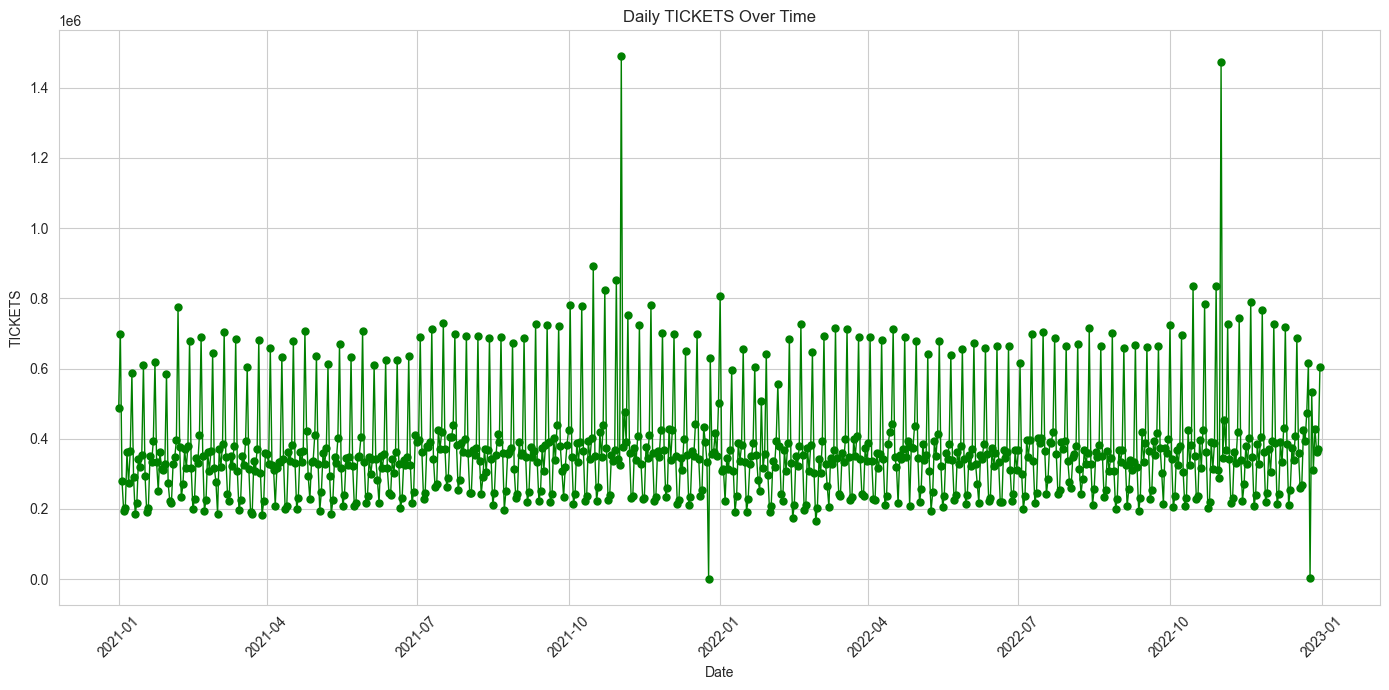

In [54]:
# Aggregate GROSS_MARGIN by date
TICKETS_daily = df.groupby('DATE_DIM')['TICKETS'].sum()

# Plot the time series of GROSS_MARGIN
plt.figure(figsize=(14, 7))
plt.plot(TICKETS_daily.index, TICKETS_daily.values, color='green', marker='o', linestyle='-', linewidth=1, markersize=5)
plt.title('Daily TICKETS Over Time')
plt.xlabel('Date')
plt.ylabel('TICKETS')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()


### 3.2.9 TOTAL BET_ACCOUNT_NUM_HASH DAY vs DIM_DATE

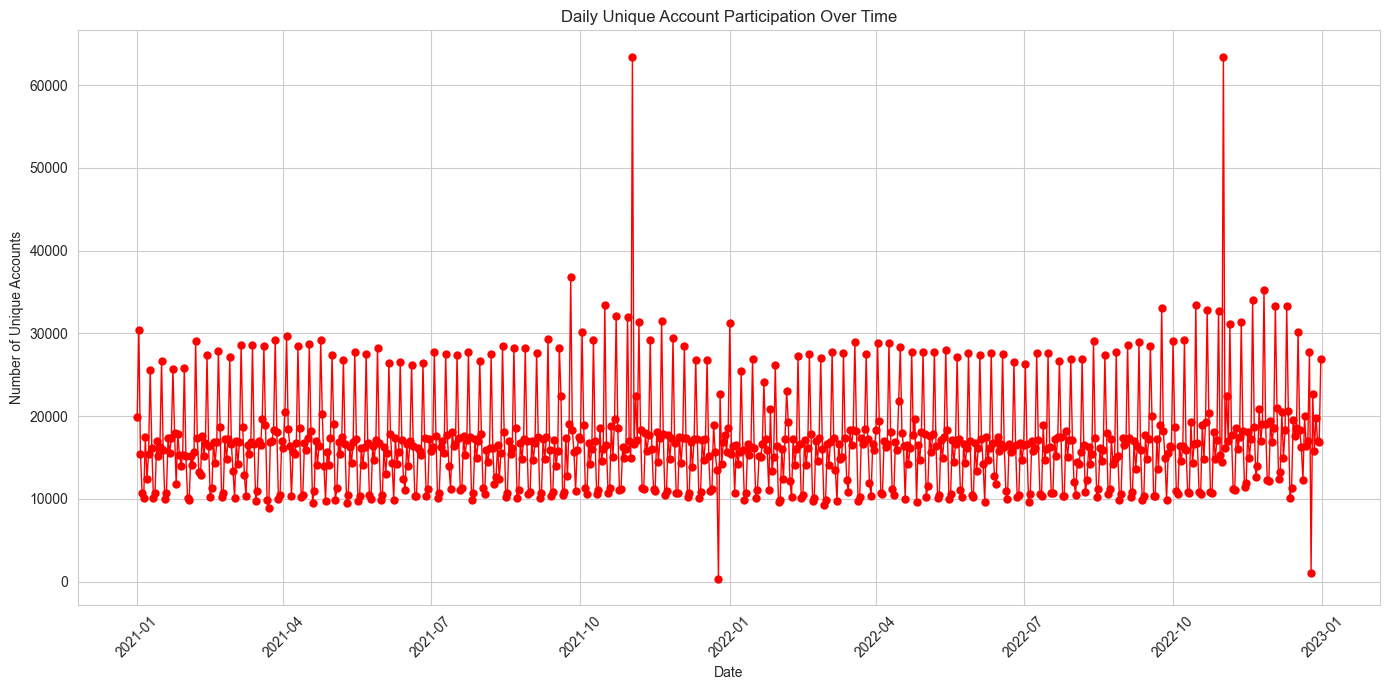

In [55]:
# Count unique BET_ACCOUNT_NUM_HASH per day
daily_account_participation = df.groupby('DATE_DIM')['BET_ACCOUNT_NUM_HASH'].nunique()

# Plot the time series of daily unique account participation
plt.figure(figsize=(14, 7))
plt.plot(daily_account_participation.index, daily_account_participation.values, color='red', marker='o', linestyle='-', linewidth=1, markersize=5)
plt.title('Daily Unique Account Participation Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Unique Accounts')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()


## 3.4 Decomposition Analysis: 

In [ ]:
import statsmodels.api as sm
# Thực hiện phân tích phân rã
decomposition = sm.tsa.seasonal_decompose(df['TICKETS'], model='additive')

# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df['TICKETS'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## 3.5 Dynamic Time Warping (DTW)

In [ ]:
!pip install fastdtw
from fastdtw import fastdtw
import numpy as np

# Chuyển đổi hai chuỗi thời gian thành mảng numpy
time_series_1 = np.array(daily_account_participation.values)
time_series_2 = np.array(TICKETS_daily.values)

# Tính toán DTW giữa hai chuỗi thời gian
distance, path = fastdtw(time_series_1, time_series_2)

# In ra khoảng cách tính được
print("Dynamic Time Warping Distance:", distance)


# IV. DATA STANDARDIZING & NORMALIZATION

Sẽ dùng label encoder, và min max scaler

# V. TRAIN - VALID - TEST SPLIT

CHia dữ liệu ra 9:0,5:0,5

# VI. FORECASTING

DÙNG DEEP LEARNING ĐỂ LÀM VÀ DỰ ĐOÁN

# VII. EVALUATION